51
51


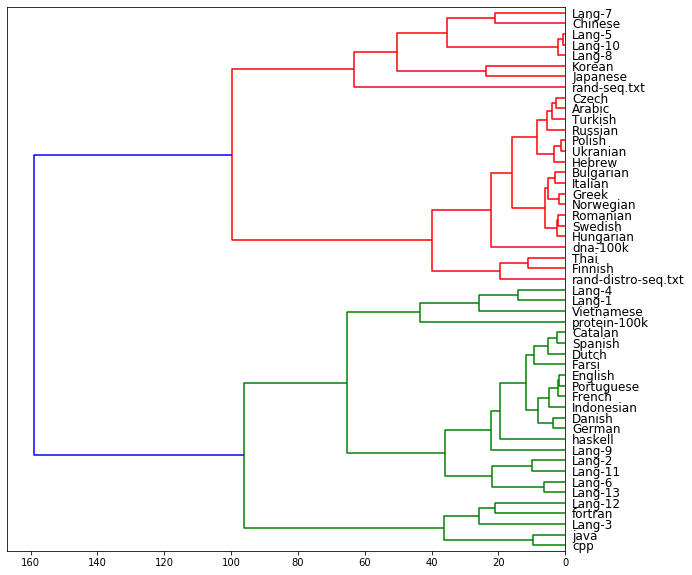

51
51


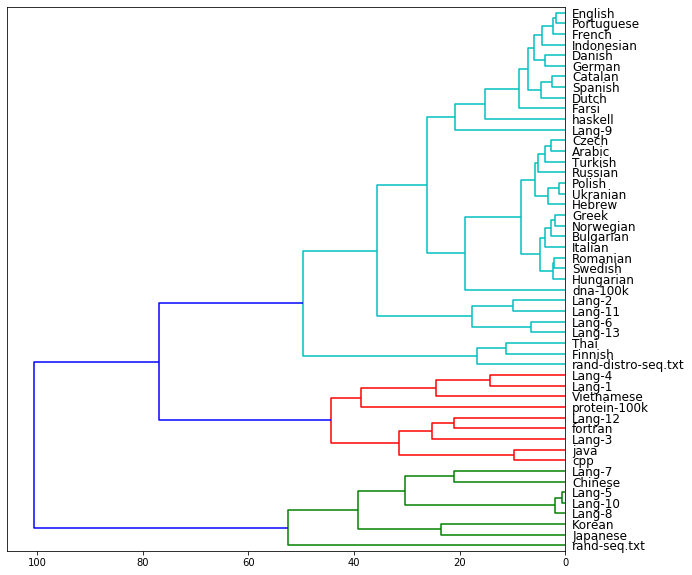

In [31]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# real_files={'sv-cleaned.txt': ['86', '1185', '7183', '0.09', '1.238', '7.523', '5053', '11954', '13455', '35.544', '85.361', '97.557', 8.09170886088493, 13.382880935835267, 3.646325955373697, 3.018551966957245, 2.8416289889664514, 0.3173305046389918, 10.934239111955879, 13.697415800643851, 4.4450962263286895, 10.300248457554048], 'hu-cleaned.txt': ['96', '1403', '8039', '0.097', '1.425', '8.189', '5297', '11794', '13322', '37.016', '84.021', '96.789', 8.443912697661476, 13.287140858210547, 3.770513858709171, 2.7238646271300757, 2.8362712578889697, 0.39224388486901135, 11.279737529255211, 13.674400896445297, 4.6732277276428835, 10.470725275911091], 'ru-cleaned.txt': ['71', '1195', '7203', '0.074', '1.248', '7.539', '5656', '11063', '12149', '43.348', '86.423', '96.774', 8.2912221541863, 13.238854191135788, 3.6971313045475878, 2.274573123645776, 2.869983366497524, 0.29924652798103846, 11.161063017270454, 13.539714482605508, 4.594754914490176, 10.865066361298327], 'ar-cleaned.txt': ['46', '922', '7314', '0.048', '0.973', '7.739', '6627', '14296', '15411', '41.08', '89.901', '98.335', 7.991252535697224, 13.687123045008859, 3.674074700836678, 2.419837377781043, 2.8588159899882046, 0.20474799508696395, 10.849560963814588, 13.896717879341278, 4.318010642513182, 11.19407207025391], 'uk-cleaned.txt': ['97', '1089', '6514', '0.097', '1.096', '6.569', '5274', '11923', '13020', '37.956', '87.207', '96.81', 8.291797413419088, 13.39737612940614, 3.6645599819291084, 2.4661435132330554, 2.7517445199411155, 0.23799633671901013, 11.04320242586163, 13.637250517936284, 4.6274952245085235, 10.851471730289468], 'pt-cleaned.txt': ['103', '1087', '5389', '0.104', '1.103', '5.482', '4567', '12410', '14932', '27.955', '76.923', '93.741', 7.718198064951785, 13.239774890484927, 3.3800687122162065, 3.360611876164954, 2.7210416614557613, 0.5349334146162847, 10.439433233569682, 13.769118972471036, 4.337444525325253, 9.834762603570134], 'en-cleaned.txt': ['53', '981', '5751', '0.053', '0.986', '5.792', '4607', '12605', '15160', '28.188', '78.059', '95.035', 7.8346272472451615, 13.20244079723972, 3.505521758638739, 3.365121531291376, 2.7763835470397313, 0.6427350802581472, 10.609988556701238, 13.838414695290522, 4.329356577815624, 9.795879661091318], 'fi-cleaned.txt': ['71', '1175', '6712', '0.074', '1.23', '7.043', '5995', '10288', '10759', '51.945', '91.06', '97.322', 8.011765645535013, 13.216441774811681, 3.655532951185393, 1.7754225442581437, 2.9665928710214944, 0.14781882222513415, 10.980447782655478, 13.361742417565969, 4.354579911289354, 11.317395773145188], 'de-cleaned.txt': ['98', '1337', '7401', '0.103', '1.413', '7.836', '4529', '11047', '12939', '30.915', '76.476', '90.864', 8.136219894430988, 13.106302226471982, 3.593715724163133, 2.830149538970019, 2.7894502854364154, 0.4513595720346397, 10.926621345341806, 13.558005321129178, 4.542913660548616, 10.218542513626803], 'ro-cleaned.txt': ['146', '1231', '6188', '0.149', '1.256', '6.326', '5419', '12434', '14090', '36.289', '84.184', '96.461', 7.890275384771638, 13.408236229209416, 3.5136544397584046, 2.889259947058672, 2.860415634443262, 0.349335718503567, 10.750542413452806, 13.753596470601854, 4.376022034899159, 10.475298350812757], 'no-cleaned.txt': ['75', '1221', '7041', '0.078', '1.278', '7.387', '4852', '11746', '13503', '33.434', '81.985', '95.482', 8.097550169666674, 13.286395458698715, 3.670348371686557, 2.940893501267083, 2.8703912463340746, 0.3800964672367718, 10.96932961452577, 13.66338449917216, 4.426384790229165, 10.29384773573147], 'it-cleaned.txt': ['95', '850', '4481', '0.096', '0.858', '4.532', '4828', '12338', '14141', '32.427', '83.909', '97.397', 7.4675145702780465, 13.41243660288885, 3.2972187739670473, 3.046498382271916, 2.694476838087352, 0.358281237689992, 10.161978166059091, 13.767813154408985, 4.169553100161342, 10.315797735587406], 'el-cleaned.txt': ['73', '1137', '6989', '0.078', '1.223', '7.53', '4654', '11164', '13175', '33.061', '80.334', '96.049', 8.257338291603864, 13.135357228865978, 3.596928828231832, 3.0612258421513614, 2.69961751826526, 0.4946506159708915, 10.95737210034367, 13.627329111340456, 4.660089582654879, 10.025734157543212], 'tr-cleaned.txt': ['76', '1103', '6311', '0.077', '1.115', '6.383', '5962', '12038', '12998', '44.673', '90.832', '98.769', 8.098666666364913, 13.4174742888232, 3.5629889159636643, 2.1933904150421593, 2.750967923399349, 0.23951745279987535, 10.849857187609759, 13.656729192671738, 4.535381336097156, 11.195798362813925], 'nl-cleaned.txt': ['90', '1082', '6063', '0.094', '1.136', '6.375', '4256', '10582', '12797', '29.255', '73.512', '89.854', 7.8651735865652475, 12.855965918815311, 3.527421581517571, 2.980041630190654, 2.7933564699935816, 0.6270645395319255, 10.659423585146376, 13.475152041152443, 4.337463772978632, 9.841168227661658], 'vi-cleaned.txt': ['95', '288', '2776', '0.232', '0.707', '6.853', '200', '4211', '13039', '1.153', '24.583', '77.058', 6.419721624223565, 11.004614754816304, 2.843940156827122, 5.036639558986322, 2.6105405511532473, 2.4469357071443203, 9.029551543783112, 13.442382633633784, 3.581912314618425, 5.972873825405278], 'bg-cleaned.txt': ['79', '1002', '5992', '0.083', '1.054', '6.319', '5086', '12144', '13879', '34.349', '83.104', '96.255', 7.8802351970603555, 13.350196017502352, 3.52669685333559, 3.184364437843707, 2.787408004737145, 0.37593041939609023, 10.668155285448785, 13.72660431742157, 4.353435707028219, 10.114580143285453], 'he-cleaned.txt': ['71', '680', '5585', '0.073', '0.705', '5.808', '6660', '14766', '15940', '39.57', '89.151', '97.821', 7.881131372195645, 13.718088646722746, 3.6490293671126826, 2.257975852139809, 2.9828111136773527, 0.22364793907671204, 10.863624378053625, 13.94180656669696, 4.232980768816257, 11.372737426855522], 'id-cleaned.txt': ['67', '847', '4924', '0.068', '0.857', '4.991', '3793', '10986', '12827', '27.604', '81.036', '95.917', 7.552741128299203, 13.19268395215795, 3.3134731852788795, 3.0470411621803457, 2.7001039193437117, 0.4219298467456718, 10.253116221404815, 13.611483473333818, 4.238826815974542, 10.093111461293965], 'pl-cleaned.txt': ['94', '1308', '7193', '0.096', '1.343', '7.403', '5146', '11886', '13024', '37.309', '87.487', '97.347', 8.357226099886416, 13.403276880727752, 3.69097626653708, 2.5053057194132338, 2.780430426970078, 0.24736813921111955, 11.136110527585084, 13.647236906819096, 4.667336736122973, 10.825337176092424], 'cs-cleaned.txt': ['106', '1523', '8819', '0.107', '1.533', '8.896', '6085', '12922', '13748', '42.493', '91.399', '98.51', 8.589796219945303, 13.577995061410077, 3.801152539639756, 2.385908406481777, 2.8914810465919127, 0.15831636316669767, 11.480255358664248, 13.736215632877482, 4.789144171042508, 11.129884629021314], 'th-cleaned.txt': ['82', '1519', '11887', '0.093', '1.74', '13.7', '3372', '4631', '4337', '59.345', '89.765', '93.55', 9.068959178988766, 11.887998068607045, 4.136375203259718, 1.5215525860468533, 2.861344415420107, 0.048314803358935364, 11.931564068400593, 11.919469939246529, 4.931507329326201, 9.729039968679668], 'ja-cleaned.txt': ['1764', '22160', '50141', '1.909', '24.115', '54.856', '2009', '2675', '2271', '60.658', '94.757', '97.301', 12.69268261751324, 11.286097827451576, 4.521984507510957, 1.577228175666924, 2.0162774208197836, -0.12688588185842628, 14.727934739292627, 11.123002981774349, 8.160636260308621, 8.68287422069239], 'da-cleaned.txt': ['91', '1253', '7093', '0.094', '1.294', '7.343', '4950', '12007', '13839', '32.239', '79.354', '92.829', 8.03428795044289, 13.24892342510761, 3.6298726122445055, 2.99460141226555, 2.829685876134745, 0.4121203485435054, 10.864641949334144, 13.65777245578156, 4.404197854051458, 10.19406386639535], 'ko-cleaned.txt': ['1341', '12675', '32697', '1.581', '15.003', '38.85', '10499', '18114', '19364', '49.725', '87.128', '94.615', 11.201362886908672, 13.820856085026755, 4.398002050696096, 1.6186924961584503, 2.556565576116569, 0.27119947099068575, 13.758959957990498, 14.103242670990342, 6.802174438343749, 12.107389655994606], 'es-cleaned.txt': ['72', '980', '4991', '0.075', '1.02', '5.203', '4302', '11314', '14279', '27.224', '72.493', '92.649', 7.582985297581789, 12.947427706351203, 3.3341215109792426, 3.5406800803168217, 2.6443202879648635, 0.7857531686673596, 10.226899492106247, 13.723881722932672, 4.248277327718143, 9.368909353235114], 'fa-cleaned.txt': ['61', '907', '5791', '0.062', '0.924', '5.912', '4206', '14383', '17976', '21.655', '75.084', '95.166', 7.814555691503221, 13.434976985358777, 3.6089155791658203, 3.678314852631402, 2.7523694398220613, 0.6416136816800867, 10.567806624352006, 14.091343313436319, 4.205511047041502, 9.70756097110228], 'ca-cleaned.txt': ['104', '1054', '5304', '0.105', '1.063', '5.363', '4381', '12305', '15328', '26.085', '74.265', '93.789', 7.709273626319572, 13.176697065375274, 3.4328329357212017, 3.4551768477717766, 2.6867051969575626, 0.6896312705569551, 10.395352176417852, 13.856035388339057, 4.276559625789414, 9.674342734357621], 'fr-cleaned.txt': ['81', '1075', '5779', '0.082', '1.091', '5.876', '4683', '11902', '14233', '30.062', '77.522', '94.084', 7.77762633227321, 13.218063778673002, 3.4473716411610464, 3.2772429732467354, 2.6812357301721974, 0.5320685845174435, 10.459298564122298, 13.743837517406709, 4.329752573390447, 9.88554025537931], 'zh-cleaned.txt': ['2587', '31330', '54029', '3.561', '43.481', '75.6', '2446', '3098', '2609', '63.582', '95.089', '97.752', 13.585468728327685, 11.454128515912057, 4.451188721103145, 1.5055973203188615, 1.5100099104784686, -0.14064022550643124, 15.10227004283495, 11.313160680071453, 9.137565199134038, 8.839867395977846]}
# fake_files= {'cpp-cleaned.txt': ['92', '1616', '4927', '0.092', '1.616', '4.926', '1494', '2856', '3453', '13.205', '25.245', '30.525', 8.620079052459579, 10.343826224433217, 3.3539547459471173, 2.001307079272228, 1.5598796989834196, 0.553126190805034, 10.179975212973194, 10.896676436833749, 5.266130321186844, 8.342971973719473], 'protein-100k-cleaned.txt': ['21', '401', '7819', '0.018', '0.346', '6.803', '584', '1165', '582', '19.61', '58.69', '58.669', 8.333996888013766, 10.128726818478688, 4.150527340878508, 3.9820296908162662, 4.046297968856993, -1.0007269816434379, 12.381300959647966, 9.127583407161067, 4.183789125382607, 4.625446804078556], 'haskell-cleaned.txt': ['117', '2239', '9120', '0.117', '2.239', '9.118', '3734', '9103', '11080', '27.766', '67.695', '82.404', 8.982043142500167, 12.69206143997818, 3.8945401535635003, 2.776349132042055, 2.4656331052056273, 0.5314954317215937, 11.447651672968957, 13.223480794406433, 5.087517295984849, 9.915994832602019], 'fortran-cleaned.txt': ['83', '1621', '7173', '0.083', '1.621', '7.173', '2576', '6989', '9601', '13.733', '37.261', '51.189', 8.863872039520317, 11.71968932662056, 3.741802537856948, 2.939202231055471, 2.163254261706609, 0.9107537735305307, 11.027130391949626, 12.630311118270411, 5.122076247578447, 8.780775758071856], 'dna-100k-cleaned.txt': ['5', '20', '72', '0.005', '0.021', '0.076', '1632', '3261', '1630', '32.956', '98.788', '98.788', 3.9553382900296143, 11.662325850969081, 1.9487945435695633, 4.747892314013221, 1.9395604077333, -1.0004371140893797, 5.894633911704974, 10.661880748524496, 2.0065995108264754, 5.137487327803134], 'java-cleaned.txt': ['89', '1090', '3046', '0.089', '1.09', '3.046', '985', '1953', '2811', '9.079', '18.003', '25.915', 8.701063417287237, 9.878328428326306, 3.4119508937209693, 2.125167876597256, 1.5544053928014647, 0.8087407449573538, 10.255451818733045, 10.686744031490091, 5.289119146965033, 7.753681531902107]}
# unknown_files= {'1.txt': ['28', '435', '2328', '0.06', '0.966', '5.4', '1612', '8108', '11865', '8.356', '46.721', '76.965', 3.8114634225963826, 6.923612005795293, 9.466953874836863, 3.145256826039843, 2.5786250083106865, 7.177199821601062, 11.82680776416384, 13.227819336745547, 4.218338999701869, 1.211333353739239], '10.txt': ['78', '4681', '21410', '0.24', '15.429', '75.925', '6910', '9058', '6920', '61.674', '99.956', '100.0', 5.698247327362059, 11.138372722173097, 14.207333356453645, 5.475675075607388, 3.1571315086563945, 9.21883105170624, 13.144730968186087, 12.756556322524089, 2.3110447577246114, -0.3881904009661264], '11.txt': ['75', '1289', '4416', '0.161', '2.881', '10.323', '458', '7431', '9332', '3.397', '64.539', '97.748', 5.547145410668168, 9.322367628437243, 10.763079737634648, 3.799974849707217, 1.4705035488798568, 6.809114612938958, 12.232263492381884, 13.170050634105086, 4.73429639812416, 0.5585899413106401], '12.txt': ['11', '120', '880', '0.026', '0.3', '2.379', '592', '3677', '6132', '3.367', '25.27', '53.234', 3.079201801492162, 5.7098855625653915, 7.650662333571914, 2.638750083077402, 1.9943382305920345, 5.642641471533023, 9.818372580635902, 11.651107663852795, 3.5283650640656288, 1.5559907398029493], '13.txt': ['71', '817', '4649', '0.066', '0.771', '4.465', '3454', '14340', '18978', '14.207', '63.986', '92.53', 4.352915708709991, 7.742463698175724, 10.328247763606262, 3.397190459333495, 2.5826392806858505, 8.596364587178924, 13.164016271120428, 14.130743801735955, 4.150355723448106, 0.8310600852436263], '2.txt': ['77', '1393', '5147', '0.162', '3.062', '11.836', '523', '8872', '9922', '3.739', '74.038', '99.439', 5.630922622004902, 9.934380267345846, 11.647357771295546, 4.327789872549698, 1.751676307908929, 7.562491434722128, 12.809157591938227, 13.272856328531077, 4.450225230059887, 0.1818642686517536], '3.txt': ['870', '1613', '3566', '4.839', '9.807', '23.636', '871', '3310', '4794', '6.456', '28.478', '49.149', 4.693147735554595, 7.772854556234202, 9.74970055875431, 3.228795354620361, 1.8322409935945139, 6.056522097551614, 9.959649352592939, 11.487777489702054, 3.3877964785695323, 0.8793750074258652], '4.txt': ['76', '1234', '3650', '0.142', '2.408', '7.432', '432', '5373', '9473', '2.882', '41.826', '88.5', 5.404060111916638, 8.33378293901293, 9.496008397990886, 2.956298086899417, 1.1813351090132418, 5.887098805296996, 11.184944661814882, 13.091460698543163, 4.784219183535647, 1.49730098101033], '5.txt': ['77', '4727', '22110', '0.228', '15.017', '75.662', '7186', '9452', '7197', '61.361', '99.979', '100.0', 5.70515741756499, 11.159041124778353, 14.250501342086071, 5.48940343032571, 3.179242640264882, 9.219374719365373, 13.20628604802588, 12.81317994301459, 2.3530121690516608, -0.3935292063440598], '6.txt': ['99', '2002', '11952', '0.042', '0.87', '5.262', '7365', '30898', '42362', '13.573', '60.284', '87.802', 4.852936893465496, 8.481641724999038, 11.230424530176123, 3.6360585798691716, 2.7543470544929045, 9.447373462873042, 14.073670900311875, 15.188507100280399, 4.316887815124535, 1.0417506326480859], '7.txt': ['2374', '22603', '40835', '4.083', '39.435', '72.282', '5104', '6419', '5855', '67.495', '95.28', '99.036', 8.943819069379002, 13.269681333518417, 14.883841221656997, 4.340353449970178, 1.6103017552939805, 10.34598096583313, 12.532837235097169, 12.500599053745931, 1.3113203792081305, -0.029172607029452492], '8.txt': ['77', '4587', '19926', '0.259', '16.511', '77.289', '6352', '8356', '6355', '61.331', '100.0', '100.0', 5.702209133724757, 11.13754531029953, 14.11958097393613, 5.471870027451177, 3.0684252899143423, 9.099836867566127, 13.028596777067108, 12.63367640989232, 2.3176091727574346, -0.3949203671747516], '9.txt': ['104', '1223', '6786', '0.118', '1.387', '7.716', '4671', '10585', '12250', '33.655', '77.586', '91.37', 4.688304228957838, 8.210032096308796, 10.88908214802002, 3.52897059712392, 2.685923834634916, 10.042308139975141, 13.085665102584924, 13.520971732211754, 2.9713212590311233, 0.4374216106089418]}

real_files={'sv-cleaned.txt': ['0.09', '1.238', '7.523', '35.544', '85.361', '97.557', 8.09170886088493, 13.382880935835267, 3.646325955373697, 3.018551966957245, 2.8416289889664514, 0.3173305046389918, 10.934239111955879, 13.697415800643851, 4.4450962263286895, 10.300248457554048], 'hu-cleaned.txt': ['0.097', '1.425', '8.189', '37.016', '84.021', '96.789', 8.443912697661476, 13.287140858210547, 3.770513858709171, 2.7238646271300757, 2.8362712578889697, 0.39224388486901135, 11.279737529255211, 13.674400896445297, 4.6732277276428835, 10.470725275911091], 'ru-cleaned.txt': ['0.074', '1.248', '7.539', '43.348', '86.423', '96.774', 8.2912221541863, 13.238854191135788, 3.6971313045475878, 2.274573123645776, 2.869983366497524, 0.29924652798103846, 11.161063017270454, 13.539714482605508, 4.594754914490176, 10.865066361298327], 'ar-cleaned.txt': ['0.048', '0.973', '7.739', '41.08', '89.901', '98.335', 7.991252535697224, 13.687123045008859, 3.674074700836678, 2.419837377781043, 2.8588159899882046, 0.20474799508696395, 10.849560963814588, 13.896717879341278, 4.318010642513182, 11.19407207025391], 'uk-cleaned.txt': ['0.097', '1.096', '6.569', '37.956', '87.207', '96.81', 8.291797413419088, 13.39737612940614, 3.6645599819291084, 2.4661435132330554, 2.7517445199411155, 0.23799633671901013, 11.04320242586163, 13.637250517936284, 4.6274952245085235, 10.851471730289468], 'pt-cleaned.txt': ['0.104', '1.103', '5.482', '27.955', '76.923', '93.741', 7.718198064951785, 13.239774890484927, 3.3800687122162065, 3.360611876164954, 2.7210416614557613, 0.5349334146162847, 10.439433233569682, 13.769118972471036, 4.337444525325253, 9.834762603570134], 'en-cleaned.txt': ['0.053', '0.986', '5.792', '28.188', '78.059', '95.035', 7.8346272472451615, 13.20244079723972, 3.505521758638739, 3.365121531291376, 2.7763835470397313, 0.6427350802581472, 10.609988556701238, 13.838414695290522, 4.329356577815624, 9.795879661091318], 'fi-cleaned.txt': ['0.074', '1.23', '7.043', '51.945', '91.06', '97.322', 8.011765645535013, 13.216441774811681, 3.655532951185393, 1.7754225442581437, 2.9665928710214944, 0.14781882222513415, 10.980447782655478, 13.361742417565969, 4.354579911289354, 11.317395773145188], 'de-cleaned.txt': ['0.103', '1.413', '7.836', '30.915', '76.476', '90.864', 8.136219894430988, 13.106302226471982, 3.593715724163133, 2.830149538970019, 2.7894502854364154, 0.4513595720346397, 10.926621345341806, 13.558005321129178, 4.542913660548616, 10.218542513626803], 'ro-cleaned.txt': ['0.149', '1.256', '6.326', '36.289', '84.184', '96.461', 7.890275384771638, 13.408236229209416, 3.5136544397584046, 2.889259947058672, 2.860415634443262, 0.349335718503567, 10.750542413452806, 13.753596470601854, 4.376022034899159, 10.475298350812757], 'no-cleaned.txt': ['0.078', '1.278', '7.387', '33.434', '81.985', '95.482', 8.097550169666674, 13.286395458698715, 3.670348371686557, 2.940893501267083, 2.8703912463340746, 0.3800964672367718, 10.96932961452577, 13.66338449917216, 4.426384790229165, 10.29384773573147], 'it-cleaned.txt': ['0.096', '0.858', '4.532', '32.427', '83.909', '97.397', 7.4675145702780465, 13.41243660288885, 3.2972187739670473, 3.046498382271916, 2.694476838087352, 0.358281237689992, 10.161978166059091, 13.767813154408985, 4.169553100161342, 10.315797735587406], 'el-cleaned.txt': ['0.078', '1.223', '7.53', '33.061', '80.334', '96.049', 8.257338291603864, 13.135357228865978, 3.596928828231832, 3.0612258421513614, 2.69961751826526, 0.4946506159708915, 10.95737210034367, 13.627329111340456, 4.660089582654879, 10.025734157543212], 'tr-cleaned.txt': ['0.077', '1.115', '6.383', '44.673', '90.832', '98.769', 8.098666666364913, 13.4174742888232, 3.5629889159636643, 2.1933904150421593, 2.750967923399349, 0.23951745279987535, 10.849857187609759, 13.656729192671738, 4.535381336097156, 11.195798362813925], 'nl-cleaned.txt': ['0.094', '1.136', '6.375', '29.255', '73.512', '89.854', 7.8651735865652475, 12.855965918815311, 3.527421581517571, 2.980041630190654, 2.7933564699935816, 0.6270645395319255, 10.659423585146376, 13.475152041152443, 4.337463772978632, 9.841168227661658], 'vi-cleaned.txt': ['0.232', '0.707', '6.853', '1.153', '24.583', '77.058', 6.419721624223565, 11.004614754816304, 2.843940156827122, 5.036639558986322, 2.6105405511532473, 2.4469357071443203, 9.029551543783112, 13.442382633633784, 3.581912314618425, 5.972873825405278], 'bg-cleaned.txt': ['0.083', '1.054', '6.319', '34.349', '83.104', '96.255', 7.8802351970603555, 13.350196017502352, 3.52669685333559, 3.184364437843707, 2.787408004737145, 0.37593041939609023, 10.668155285448785, 13.72660431742157, 4.353435707028219, 10.114580143285453], 'he-cleaned.txt': ['0.073', '0.705', '5.808', '39.57', '89.151', '97.821', 7.881131372195645, 13.718088646722746, 3.6490293671126826, 2.257975852139809, 2.9828111136773527, 0.22364793907671204, 10.863624378053625, 13.94180656669696, 4.232980768816257, 11.372737426855522], 'id-cleaned.txt': ['0.068', '0.857', '4.991', '27.604', '81.036', '95.917', 7.552741128299203, 13.19268395215795, 3.3134731852788795, 3.0470411621803457, 2.7001039193437117, 0.4219298467456718, 10.253116221404815, 13.611483473333818, 4.238826815974542, 10.093111461293965], 'pl-cleaned.txt': ['0.096', '1.343', '7.403', '37.309', '87.487', '97.347', 8.357226099886416, 13.403276880727752, 3.69097626653708, 2.5053057194132338, 2.780430426970078, 0.24736813921111955, 11.136110527585084, 13.647236906819096, 4.667336736122973, 10.825337176092424], 'cs-cleaned.txt': ['0.107', '1.533', '8.896', '42.493', '91.399', '98.51', 8.589796219945303, 13.577995061410077, 3.801152539639756, 2.385908406481777, 2.8914810465919127, 0.15831636316669767, 11.480255358664248, 13.736215632877482, 4.789144171042508, 11.129884629021314], 'th-cleaned.txt': ['0.093', '1.74', '13.7', '59.345', '89.765', '93.55', 9.068959178988766, 11.887998068607045, 4.136375203259718, 1.5215525860468533, 2.861344415420107, 0.048314803358935364, 11.931564068400593, 11.919469939246529, 4.931507329326201, 9.729039968679668], 'ja-cleaned.txt': ['1.909', '24.115', '54.856', '60.658', '94.757', '97.301', 12.69268261751324, 11.286097827451576, 4.521984507510957, 1.577228175666924, 2.0162774208197836, -0.12688588185842628, 14.727934739292627, 11.123002981774349, 8.160636260308621, 8.68287422069239], 'da-cleaned.txt': ['0.094', '1.294', '7.343', '32.239', '79.354', '92.829', 8.03428795044289, 13.24892342510761, 3.6298726122445055, 2.99460141226555, 2.829685876134745, 0.4121203485435054, 10.864641949334144, 13.65777245578156, 4.404197854051458, 10.19406386639535], 'ko-cleaned.txt': ['1.581', '15.003', '38.85', '49.725', '87.128', '94.615', 11.201362886908672, 13.820856085026755, 4.398002050696096, 1.6186924961584503, 2.556565576116569, 0.27119947099068575, 13.758959957990498, 14.103242670990342, 6.802174438343749, 12.107389655994606], 'es-cleaned.txt': ['0.075', '1.02', '5.203', '27.224', '72.493', '92.649', 7.582985297581789, 12.947427706351203, 3.3341215109792426, 3.5406800803168217, 2.6443202879648635, 0.7857531686673596, 10.226899492106247, 13.723881722932672, 4.248277327718143, 9.368909353235114], 'fa-cleaned.txt': ['0.062', '0.924', '5.912', '21.655', '75.084', '95.166', 7.814555691503221, 13.434976985358777, 3.6089155791658203, 3.678314852631402, 2.7523694398220613, 0.6416136816800867, 10.567806624352006, 14.091343313436319, 4.205511047041502, 9.70756097110228], 'ca-cleaned.txt': ['0.105', '1.063', '5.363', '26.085', '74.265', '93.789', 7.709273626319572, 13.176697065375274, 3.4328329357212017, 3.4551768477717766, 2.6867051969575626, 0.6896312705569551, 10.395352176417852, 13.856035388339057, 4.276559625789414, 9.674342734357621], 'fr-cleaned.txt': ['0.082', '1.091', '5.876', '30.062', '77.522', '94.084', 7.77762633227321, 13.218063778673002, 3.4473716411610464, 3.2772429732467354, 2.6812357301721974, 0.5320685845174435, 10.459298564122298, 13.743837517406709, 4.329752573390447, 9.88554025537931], 'zh-cleaned.txt': ['3.561', '43.481', '75.6', '63.582', '95.089', '97.752', 13.585468728327685, 11.454128515912057, 4.451188721103145, 1.5055973203188615, 1.5100099104784686, -0.14064022550643124, 15.10227004283495, 11.313160680071453, 9.137565199134038, 8.839867395977846]}
fake_files={'cpp-cleaned.txt': ['0.092', '1.616', '4.926', '13.205', '25.245', '30.525', 8.620079052459579, 10.343826224433217, 3.3539547459471173, 2.001307079272228, 1.5598796989834196, 0.553126190805034, 10.179975212973194, 10.896676436833749, 5.266130321186844, 8.342971973719473], 'protein-100k-cleaned.txt': ['0.018', '0.346', '6.803', '19.61', '58.69', '58.669', 8.333996888013766, 10.128726818478688, 4.150527340878508, 3.9820296908162662, 4.046297968856993, -1.0007269816434379, 12.381300959647966, 9.127583407161067, 4.183789125382607, 4.625446804078556], 'haskell-cleaned.txt': ['0.117', '2.239', '9.118', '27.766', '67.695', '82.404', 8.982043142500167, 12.69206143997818, 3.8945401535635003, 2.776349132042055, 2.4656331052056273, 0.5314954317215937, 11.447651672968957, 13.223480794406433, 5.087517295984849, 9.915994832602019], 'fortran-cleaned.txt': ['0.083', '1.621', '7.173', '13.733', '37.261', '51.189', 8.863872039520317, 11.71968932662056, 3.741802537856948, 2.939202231055471, 2.163254261706609, 0.9107537735305307, 11.027130391949626, 12.630311118270411, 5.122076247578447, 8.780775758071856], 'dna-100k-cleaned.txt': ['0.005', '0.021', '0.076', '32.956', '98.788', '98.788', 3.9553382900296143, 11.662325850969081, 1.9487945435695633, 4.747892314013221, 1.9395604077333, -1.0004371140893797, 5.894633911704974, 10.661880748524496, 2.0065995108264754, 5.137487327803134], 'java-cleaned.txt': ['0.089', '1.09', '3.046', '9.079', '18.003', '25.915', 8.701063417287237, 9.878328428326306, 3.4119508937209693, 2.125167876597256, 1.5544053928014647, 0.8087407449573538, 10.255451818733045, 10.686744031490091, 5.289119146965033, 7.753681531902107], 'rand-seq.txt': ['0.053', '2.809', '72.738', '99.342', '100.0', '100.0', 11.435353062703454, 10.831307243802051, 5.707799406848028, 0.012418203843854558, 4.582774515430968, -0.0015845087159921045, 16.018128695357273, 10.82972273508606, 5.727553752224563, 10.817807900675527], 'rand-distro-seq.txt': ['0.055', '1.666', '15.843', '67.52', '98.015', '99.98', 8.502260800245516, 13.852205076676062, 4.221759834259966, 1.7696549104433814, 4.000685522320485, 0.05016174611174519, 12.502956771679393, 13.90236019765768, 4.280490265116245, 12.082657291363553]}
unknown_files={'1.txt': ['0.06', '0.966', '5.4', '8.356', '46.721', '76.965', 3.8114634225963826, 6.923612005795293, 9.466953874836863, 3.145256826039843, 2.5786250083106865, 7.177199821601062, 11.82680776416384, 13.227819336745547, 4.218338999701869, 1.211333353739239], '10.txt': ['0.24', '15.429', '75.925', '61.674', '99.956', '100.0', 5.698247327362059, 11.138372722173097, 14.207333356453645, 5.475675075607388, 3.1571315086563945, 9.21883105170624, 13.144730968186087, 12.756556322524089, 2.3110447577246114, -0.3881904009661264], '11.txt': ['0.161', '2.881', '10.323', '3.397', '64.539', '97.748', 5.547145410668168, 9.322367628437243, 10.763079737634648, 3.799974849707217, 1.4705035488798568, 6.809114612938958, 12.232263492381884, 13.170050634105086, 4.73429639812416, 0.5585899413106401], '12.txt': ['0.026', '0.3', '2.379', '3.367', '25.27', '53.234', 3.079201801492162, 5.7098855625653915, 7.650662333571914, 2.638750083077402, 1.9943382305920345, 5.642641471533023, 9.818372580635902, 11.651107663852795, 3.5283650640656288, 1.5559907398029493], '13.txt': ['0.066', '0.771', '4.465', '14.207', '63.986', '92.53', 4.352915708709991, 7.742463698175724, 10.328247763606262, 3.397190459333495, 2.5826392806858505, 8.596364587178924, 13.164016271120428, 14.130743801735955, 4.150355723448106, 0.8310600852436263], '2.txt': ['0.162', '3.062', '11.836', '3.739', '74.038', '99.439', 5.630922622004902, 9.934380267345846, 11.647357771295546, 4.327789872549698, 1.751676307908929, 7.562491434722128, 12.809157591938227, 13.272856328531077, 4.450225230059887, 0.1818642686517536], '3.txt': ['4.839', '9.807', '23.636', '6.456', '28.478', '49.149', 4.693147735554595, 7.772854556234202, 9.74970055875431, 3.228795354620361, 1.8322409935945139, 6.056522097551614, 9.959649352592939, 11.487777489702054, 3.3877964785695323, 0.8793750074258652], '4.txt': ['0.142', '2.408', '7.432', '2.882', '41.826', '88.5', 5.404060111916638, 8.33378293901293, 9.496008397990886, 2.956298086899417, 1.1813351090132418, 5.887098805296996, 11.184944661814882, 13.091460698543163, 4.784219183535647, 1.49730098101033], '5.txt': ['0.228', '15.017', '75.662', '61.361', '99.979', '100.0', 5.70515741756499, 11.159041124778353, 14.250501342086071, 5.48940343032571, 3.179242640264882, 9.219374719365373, 13.20628604802588, 12.81317994301459, 2.3530121690516608, -0.3935292063440598], '6.txt': ['0.042', '0.87', '5.262', '13.573', '60.284', '87.802', 4.852936893465496, 8.481641724999038, 11.230424530176123, 3.6360585798691716, 2.7543470544929045, 9.447373462873042, 14.073670900311875, 15.188507100280399, 4.316887815124535, 1.0417506326480859], '7.txt': ['4.083', '39.435', '72.282', '67.495', '95.28', '99.036', 8.943819069379002, 13.269681333518417, 14.883841221656997, 4.340353449970178, 1.6103017552939805, 10.34598096583313, 12.532837235097169, 12.500599053745931, 1.3113203792081305, -0.029172607029452492], '8.txt': ['0.259', '16.511', '77.289', '61.331', '100.0', '100.0', 5.702209133724757, 11.13754531029953, 14.11958097393613, 5.471870027451177, 3.0684252899143423, 9.099836867566127, 13.028596777067108, 12.63367640989232, 2.3176091727574346, -0.3949203671747516], '9.txt': ['0.118', '1.387', '7.716', '33.655', '77.586', '91.37', 4.688304228957838, 8.210032096308796, 10.88908214802002, 3.52897059712392, 2.685923834634916, 10.042308139975141, 13.085665102584924, 13.520971732211754, 2.9713212590311233, 0.4374216106089418]}
countries={"ar":"Arabic", "bg":"Bulgarian", "ca":"Catalan", "cs":"Czech", "da":"Danish", "de":"German", "el":"Greek", "en":"English", "es":"Spanish", "fa":"Farsi", "fi":"Finnish", "fr":"French", "he":"Hebrew", "hu":"Hungarian", "id":"Indonesian", "it":"Italian", "ja":"Japanese", "ko":"Korean", "nl":"Dutch", "no":"Norwegian", "pl":"Polish", "pt":"Portuguese", "ro":"Romanian", "ru":"Russian", "sv":"Swedish", "th":"Thai", "tr":"Turkish", "uk":"Ukranian", "vi":"Vietnamese", "zh":"Chinese"}

X=[]
for elem in real_files:
    X.append(real_files[elem])

for elem in fake_files:
    X.append(fake_files[elem])
    
for elem in unknown_files:
    X.append(unknown_files[elem])
    
linked = linkage(X, 'complete')

labelList = [countries[elem.replace('-cleaned.txt','')]  for elem in real_files]
labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files])
print(len(X))
print(len(labelList))
plt.figure(figsize=(10,10))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,leaf_font_size=12)
plt.show()

# linked = linkage(X, 'single')

# labelList = [elem.replace('-cleaned.txt','')  for elem in real_files]
# labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
# labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files])

# print(len(X))
# print(len(labelList))
# plt.figure(figsize=(10,10))
# dendrogram(linked,
#             orientation='top',
#             labels=labelList,
#             distance_sort='descending',
#             show_leaf_counts=True, leaf_rotation=90)
# plt.show()

linked = linkage(X, 'weighted')

labelList = [countries[elem.replace('-cleaned.txt','')]  for elem in real_files]
labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files])

print(len(X))
print(len(labelList))
plt.figure(figsize=(10,10))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,leaf_font_size=12)
plt.show()

# linked = linkage(X, 'ward')

# labelList = [elem.replace('-cleaned.txt','')  for elem in real_files]
# labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
# labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files])

# print(len(X))
# print(len(labelList))
# plt.figure(figsize=(10,10))
# dendrogram(linked,
#             orientation='top',
#             labels=labelList,
#             distance_sort='descending',
#             show_leaf_counts=True, leaf_rotation=90)
# plt.show()


1
10
11
12
13
2
3
4
5
6
7
8
9
17
17


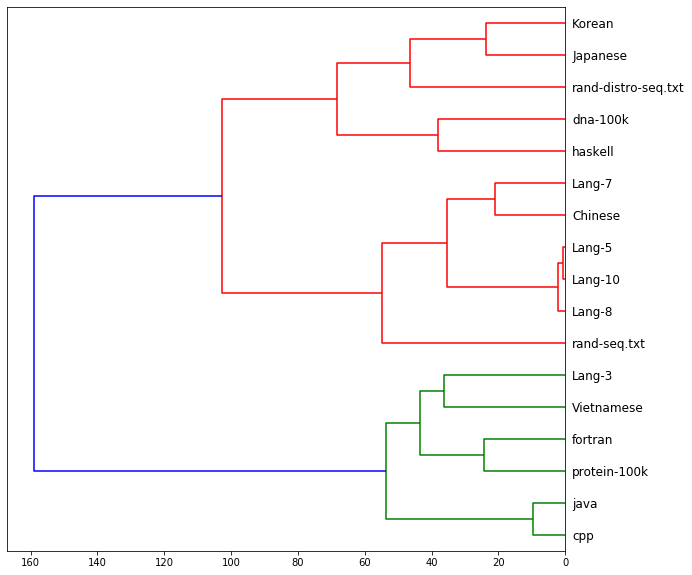

17
17


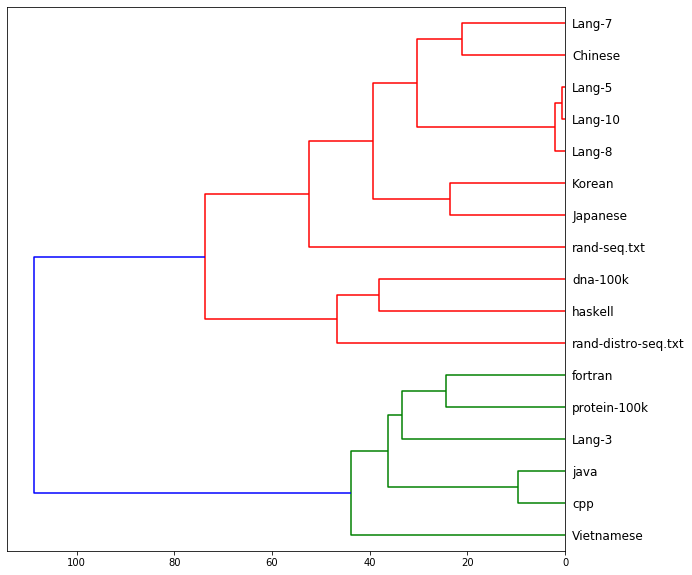

In [42]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# real_files={'sv-cleaned.txt': ['86', '1185', '7183', '0.09', '1.238', '7.523', '5053', '11954', '13455', '35.544', '85.361', '97.557', 8.09170886088493, 13.382880935835267, 3.646325955373697, 3.018551966957245, 2.8416289889664514, 0.3173305046389918, 10.934239111955879, 13.697415800643851, 4.4450962263286895, 10.300248457554048], 'hu-cleaned.txt': ['96', '1403', '8039', '0.097', '1.425', '8.189', '5297', '11794', '13322', '37.016', '84.021', '96.789', 8.443912697661476, 13.287140858210547, 3.770513858709171, 2.7238646271300757, 2.8362712578889697, 0.39224388486901135, 11.279737529255211, 13.674400896445297, 4.6732277276428835, 10.470725275911091], 'ru-cleaned.txt': ['71', '1195', '7203', '0.074', '1.248', '7.539', '5656', '11063', '12149', '43.348', '86.423', '96.774', 8.2912221541863, 13.238854191135788, 3.6971313045475878, 2.274573123645776, 2.869983366497524, 0.29924652798103846, 11.161063017270454, 13.539714482605508, 4.594754914490176, 10.865066361298327], 'ar-cleaned.txt': ['46', '922', '7314', '0.048', '0.973', '7.739', '6627', '14296', '15411', '41.08', '89.901', '98.335', 7.991252535697224, 13.687123045008859, 3.674074700836678, 2.419837377781043, 2.8588159899882046, 0.20474799508696395, 10.849560963814588, 13.896717879341278, 4.318010642513182, 11.19407207025391], 'uk-cleaned.txt': ['97', '1089', '6514', '0.097', '1.096', '6.569', '5274', '11923', '13020', '37.956', '87.207', '96.81', 8.291797413419088, 13.39737612940614, 3.6645599819291084, 2.4661435132330554, 2.7517445199411155, 0.23799633671901013, 11.04320242586163, 13.637250517936284, 4.6274952245085235, 10.851471730289468], 'pt-cleaned.txt': ['103', '1087', '5389', '0.104', '1.103', '5.482', '4567', '12410', '14932', '27.955', '76.923', '93.741', 7.718198064951785, 13.239774890484927, 3.3800687122162065, 3.360611876164954, 2.7210416614557613, 0.5349334146162847, 10.439433233569682, 13.769118972471036, 4.337444525325253, 9.834762603570134], 'en-cleaned.txt': ['53', '981', '5751', '0.053', '0.986', '5.792', '4607', '12605', '15160', '28.188', '78.059', '95.035', 7.8346272472451615, 13.20244079723972, 3.505521758638739, 3.365121531291376, 2.7763835470397313, 0.6427350802581472, 10.609988556701238, 13.838414695290522, 4.329356577815624, 9.795879661091318], 'fi-cleaned.txt': ['71', '1175', '6712', '0.074', '1.23', '7.043', '5995', '10288', '10759', '51.945', '91.06', '97.322', 8.011765645535013, 13.216441774811681, 3.655532951185393, 1.7754225442581437, 2.9665928710214944, 0.14781882222513415, 10.980447782655478, 13.361742417565969, 4.354579911289354, 11.317395773145188], 'de-cleaned.txt': ['98', '1337', '7401', '0.103', '1.413', '7.836', '4529', '11047', '12939', '30.915', '76.476', '90.864', 8.136219894430988, 13.106302226471982, 3.593715724163133, 2.830149538970019, 2.7894502854364154, 0.4513595720346397, 10.926621345341806, 13.558005321129178, 4.542913660548616, 10.218542513626803], 'ro-cleaned.txt': ['146', '1231', '6188', '0.149', '1.256', '6.326', '5419', '12434', '14090', '36.289', '84.184', '96.461', 7.890275384771638, 13.408236229209416, 3.5136544397584046, 2.889259947058672, 2.860415634443262, 0.349335718503567, 10.750542413452806, 13.753596470601854, 4.376022034899159, 10.475298350812757], 'no-cleaned.txt': ['75', '1221', '7041', '0.078', '1.278', '7.387', '4852', '11746', '13503', '33.434', '81.985', '95.482', 8.097550169666674, 13.286395458698715, 3.670348371686557, 2.940893501267083, 2.8703912463340746, 0.3800964672367718, 10.96932961452577, 13.66338449917216, 4.426384790229165, 10.29384773573147], 'it-cleaned.txt': ['95', '850', '4481', '0.096', '0.858', '4.532', '4828', '12338', '14141', '32.427', '83.909', '97.397', 7.4675145702780465, 13.41243660288885, 3.2972187739670473, 3.046498382271916, 2.694476838087352, 0.358281237689992, 10.161978166059091, 13.767813154408985, 4.169553100161342, 10.315797735587406], 'el-cleaned.txt': ['73', '1137', '6989', '0.078', '1.223', '7.53', '4654', '11164', '13175', '33.061', '80.334', '96.049', 8.257338291603864, 13.135357228865978, 3.596928828231832, 3.0612258421513614, 2.69961751826526, 0.4946506159708915, 10.95737210034367, 13.627329111340456, 4.660089582654879, 10.025734157543212], 'tr-cleaned.txt': ['76', '1103', '6311', '0.077', '1.115', '6.383', '5962', '12038', '12998', '44.673', '90.832', '98.769', 8.098666666364913, 13.4174742888232, 3.5629889159636643, 2.1933904150421593, 2.750967923399349, 0.23951745279987535, 10.849857187609759, 13.656729192671738, 4.535381336097156, 11.195798362813925], 'nl-cleaned.txt': ['90', '1082', '6063', '0.094', '1.136', '6.375', '4256', '10582', '12797', '29.255', '73.512', '89.854', 7.8651735865652475, 12.855965918815311, 3.527421581517571, 2.980041630190654, 2.7933564699935816, 0.6270645395319255, 10.659423585146376, 13.475152041152443, 4.337463772978632, 9.841168227661658], 'vi-cleaned.txt': ['95', '288', '2776', '0.232', '0.707', '6.853', '200', '4211', '13039', '1.153', '24.583', '77.058', 6.419721624223565, 11.004614754816304, 2.843940156827122, 5.036639558986322, 2.6105405511532473, 2.4469357071443203, 9.029551543783112, 13.442382633633784, 3.581912314618425, 5.972873825405278], 'bg-cleaned.txt': ['79', '1002', '5992', '0.083', '1.054', '6.319', '5086', '12144', '13879', '34.349', '83.104', '96.255', 7.8802351970603555, 13.350196017502352, 3.52669685333559, 3.184364437843707, 2.787408004737145, 0.37593041939609023, 10.668155285448785, 13.72660431742157, 4.353435707028219, 10.114580143285453], 'he-cleaned.txt': ['71', '680', '5585', '0.073', '0.705', '5.808', '6660', '14766', '15940', '39.57', '89.151', '97.821', 7.881131372195645, 13.718088646722746, 3.6490293671126826, 2.257975852139809, 2.9828111136773527, 0.22364793907671204, 10.863624378053625, 13.94180656669696, 4.232980768816257, 11.372737426855522], 'id-cleaned.txt': ['67', '847', '4924', '0.068', '0.857', '4.991', '3793', '10986', '12827', '27.604', '81.036', '95.917', 7.552741128299203, 13.19268395215795, 3.3134731852788795, 3.0470411621803457, 2.7001039193437117, 0.4219298467456718, 10.253116221404815, 13.611483473333818, 4.238826815974542, 10.093111461293965], 'pl-cleaned.txt': ['94', '1308', '7193', '0.096', '1.343', '7.403', '5146', '11886', '13024', '37.309', '87.487', '97.347', 8.357226099886416, 13.403276880727752, 3.69097626653708, 2.5053057194132338, 2.780430426970078, 0.24736813921111955, 11.136110527585084, 13.647236906819096, 4.667336736122973, 10.825337176092424], 'cs-cleaned.txt': ['106', '1523', '8819', '0.107', '1.533', '8.896', '6085', '12922', '13748', '42.493', '91.399', '98.51', 8.589796219945303, 13.577995061410077, 3.801152539639756, 2.385908406481777, 2.8914810465919127, 0.15831636316669767, 11.480255358664248, 13.736215632877482, 4.789144171042508, 11.129884629021314], 'th-cleaned.txt': ['82', '1519', '11887', '0.093', '1.74', '13.7', '3372', '4631', '4337', '59.345', '89.765', '93.55', 9.068959178988766, 11.887998068607045, 4.136375203259718, 1.5215525860468533, 2.861344415420107, 0.048314803358935364, 11.931564068400593, 11.919469939246529, 4.931507329326201, 9.729039968679668], 'ja-cleaned.txt': ['1764', '22160', '50141', '1.909', '24.115', '54.856', '2009', '2675', '2271', '60.658', '94.757', '97.301', 12.69268261751324, 11.286097827451576, 4.521984507510957, 1.577228175666924, 2.0162774208197836, -0.12688588185842628, 14.727934739292627, 11.123002981774349, 8.160636260308621, 8.68287422069239], 'da-cleaned.txt': ['91', '1253', '7093', '0.094', '1.294', '7.343', '4950', '12007', '13839', '32.239', '79.354', '92.829', 8.03428795044289, 13.24892342510761, 3.6298726122445055, 2.99460141226555, 2.829685876134745, 0.4121203485435054, 10.864641949334144, 13.65777245578156, 4.404197854051458, 10.19406386639535], 'ko-cleaned.txt': ['1341', '12675', '32697', '1.581', '15.003', '38.85', '10499', '18114', '19364', '49.725', '87.128', '94.615', 11.201362886908672, 13.820856085026755, 4.398002050696096, 1.6186924961584503, 2.556565576116569, 0.27119947099068575, 13.758959957990498, 14.103242670990342, 6.802174438343749, 12.107389655994606], 'es-cleaned.txt': ['72', '980', '4991', '0.075', '1.02', '5.203', '4302', '11314', '14279', '27.224', '72.493', '92.649', 7.582985297581789, 12.947427706351203, 3.3341215109792426, 3.5406800803168217, 2.6443202879648635, 0.7857531686673596, 10.226899492106247, 13.723881722932672, 4.248277327718143, 9.368909353235114], 'fa-cleaned.txt': ['61', '907', '5791', '0.062', '0.924', '5.912', '4206', '14383', '17976', '21.655', '75.084', '95.166', 7.814555691503221, 13.434976985358777, 3.6089155791658203, 3.678314852631402, 2.7523694398220613, 0.6416136816800867, 10.567806624352006, 14.091343313436319, 4.205511047041502, 9.70756097110228], 'ca-cleaned.txt': ['104', '1054', '5304', '0.105', '1.063', '5.363', '4381', '12305', '15328', '26.085', '74.265', '93.789', 7.709273626319572, 13.176697065375274, 3.4328329357212017, 3.4551768477717766, 2.6867051969575626, 0.6896312705569551, 10.395352176417852, 13.856035388339057, 4.276559625789414, 9.674342734357621], 'fr-cleaned.txt': ['81', '1075', '5779', '0.082', '1.091', '5.876', '4683', '11902', '14233', '30.062', '77.522', '94.084', 7.77762633227321, 13.218063778673002, 3.4473716411610464, 3.2772429732467354, 2.6812357301721974, 0.5320685845174435, 10.459298564122298, 13.743837517406709, 4.329752573390447, 9.88554025537931], 'zh-cleaned.txt': ['2587', '31330', '54029', '3.561', '43.481', '75.6', '2446', '3098', '2609', '63.582', '95.089', '97.752', 13.585468728327685, 11.454128515912057, 4.451188721103145, 1.5055973203188615, 1.5100099104784686, -0.14064022550643124, 15.10227004283495, 11.313160680071453, 9.137565199134038, 8.839867395977846]}
# fake_files= {'cpp-cleaned.txt': ['92', '1616', '4927', '0.092', '1.616', '4.926', '1494', '2856', '3453', '13.205', '25.245', '30.525', 8.620079052459579, 10.343826224433217, 3.3539547459471173, 2.001307079272228, 1.5598796989834196, 0.553126190805034, 10.179975212973194, 10.896676436833749, 5.266130321186844, 8.342971973719473], 'protein-100k-cleaned.txt': ['21', '401', '7819', '0.018', '0.346', '6.803', '584', '1165', '582', '19.61', '58.69', '58.669', 8.333996888013766, 10.128726818478688, 4.150527340878508, 3.9820296908162662, 4.046297968856993, -1.0007269816434379, 12.381300959647966, 9.127583407161067, 4.183789125382607, 4.625446804078556], 'haskell-cleaned.txt': ['117', '2239', '9120', '0.117', '2.239', '9.118', '3734', '9103', '11080', '27.766', '67.695', '82.404', 8.982043142500167, 12.69206143997818, 3.8945401535635003, 2.776349132042055, 2.4656331052056273, 0.5314954317215937, 11.447651672968957, 13.223480794406433, 5.087517295984849, 9.915994832602019], 'fortran-cleaned.txt': ['83', '1621', '7173', '0.083', '1.621', '7.173', '2576', '6989', '9601', '13.733', '37.261', '51.189', 8.863872039520317, 11.71968932662056, 3.741802537856948, 2.939202231055471, 2.163254261706609, 0.9107537735305307, 11.027130391949626, 12.630311118270411, 5.122076247578447, 8.780775758071856], 'dna-100k-cleaned.txt': ['5', '20', '72', '0.005', '0.021', '0.076', '1632', '3261', '1630', '32.956', '98.788', '98.788', 3.9553382900296143, 11.662325850969081, 1.9487945435695633, 4.747892314013221, 1.9395604077333, -1.0004371140893797, 5.894633911704974, 10.661880748524496, 2.0065995108264754, 5.137487327803134], 'java-cleaned.txt': ['89', '1090', '3046', '0.089', '1.09', '3.046', '985', '1953', '2811', '9.079', '18.003', '25.915', 8.701063417287237, 9.878328428326306, 3.4119508937209693, 2.125167876597256, 1.5544053928014647, 0.8087407449573538, 10.255451818733045, 10.686744031490091, 5.289119146965033, 7.753681531902107]}
# unknown_files= {'1.txt': ['28', '435', '2328', '0.06', '0.966', '5.4', '1612', '8108', '11865', '8.356', '46.721', '76.965', 3.8114634225963826, 6.923612005795293, 9.466953874836863, 3.145256826039843, 2.5786250083106865, 7.177199821601062, 11.82680776416384, 13.227819336745547, 4.218338999701869, 1.211333353739239], '10.txt': ['78', '4681', '21410', '0.24', '15.429', '75.925', '6910', '9058', '6920', '61.674', '99.956', '100.0', 5.698247327362059, 11.138372722173097, 14.207333356453645, 5.475675075607388, 3.1571315086563945, 9.21883105170624, 13.144730968186087, 12.756556322524089, 2.3110447577246114, -0.3881904009661264], '11.txt': ['75', '1289', '4416', '0.161', '2.881', '10.323', '458', '7431', '9332', '3.397', '64.539', '97.748', 5.547145410668168, 9.322367628437243, 10.763079737634648, 3.799974849707217, 1.4705035488798568, 6.809114612938958, 12.232263492381884, 13.170050634105086, 4.73429639812416, 0.5585899413106401], '12.txt': ['11', '120', '880', '0.026', '0.3', '2.379', '592', '3677', '6132', '3.367', '25.27', '53.234', 3.079201801492162, 5.7098855625653915, 7.650662333571914, 2.638750083077402, 1.9943382305920345, 5.642641471533023, 9.818372580635902, 11.651107663852795, 3.5283650640656288, 1.5559907398029493], '13.txt': ['71', '817', '4649', '0.066', '0.771', '4.465', '3454', '14340', '18978', '14.207', '63.986', '92.53', 4.352915708709991, 7.742463698175724, 10.328247763606262, 3.397190459333495, 2.5826392806858505, 8.596364587178924, 13.164016271120428, 14.130743801735955, 4.150355723448106, 0.8310600852436263], '2.txt': ['77', '1393', '5147', '0.162', '3.062', '11.836', '523', '8872', '9922', '3.739', '74.038', '99.439', 5.630922622004902, 9.934380267345846, 11.647357771295546, 4.327789872549698, 1.751676307908929, 7.562491434722128, 12.809157591938227, 13.272856328531077, 4.450225230059887, 0.1818642686517536], '3.txt': ['870', '1613', '3566', '4.839', '9.807', '23.636', '871', '3310', '4794', '6.456', '28.478', '49.149', 4.693147735554595, 7.772854556234202, 9.74970055875431, 3.228795354620361, 1.8322409935945139, 6.056522097551614, 9.959649352592939, 11.487777489702054, 3.3877964785695323, 0.8793750074258652], '4.txt': ['76', '1234', '3650', '0.142', '2.408', '7.432', '432', '5373', '9473', '2.882', '41.826', '88.5', 5.404060111916638, 8.33378293901293, 9.496008397990886, 2.956298086899417, 1.1813351090132418, 5.887098805296996, 11.184944661814882, 13.091460698543163, 4.784219183535647, 1.49730098101033], '5.txt': ['77', '4727', '22110', '0.228', '15.017', '75.662', '7186', '9452', '7197', '61.361', '99.979', '100.0', 5.70515741756499, 11.159041124778353, 14.250501342086071, 5.48940343032571, 3.179242640264882, 9.219374719365373, 13.20628604802588, 12.81317994301459, 2.3530121690516608, -0.3935292063440598], '6.txt': ['99', '2002', '11952', '0.042', '0.87', '5.262', '7365', '30898', '42362', '13.573', '60.284', '87.802', 4.852936893465496, 8.481641724999038, 11.230424530176123, 3.6360585798691716, 2.7543470544929045, 9.447373462873042, 14.073670900311875, 15.188507100280399, 4.316887815124535, 1.0417506326480859], '7.txt': ['2374', '22603', '40835', '4.083', '39.435', '72.282', '5104', '6419', '5855', '67.495', '95.28', '99.036', 8.943819069379002, 13.269681333518417, 14.883841221656997, 4.340353449970178, 1.6103017552939805, 10.34598096583313, 12.532837235097169, 12.500599053745931, 1.3113203792081305, -0.029172607029452492], '8.txt': ['77', '4587', '19926', '0.259', '16.511', '77.289', '6352', '8356', '6355', '61.331', '100.0', '100.0', 5.702209133724757, 11.13754531029953, 14.11958097393613, 5.471870027451177, 3.0684252899143423, 9.099836867566127, 13.028596777067108, 12.63367640989232, 2.3176091727574346, -0.3949203671747516], '9.txt': ['104', '1223', '6786', '0.118', '1.387', '7.716', '4671', '10585', '12250', '33.655', '77.586', '91.37', 4.688304228957838, 8.210032096308796, 10.88908214802002, 3.52897059712392, 2.685923834634916, 10.042308139975141, 13.085665102584924, 13.520971732211754, 2.9713212590311233, 0.4374216106089418]}

real_files={'sv-cleaned.txt': ['0.09', '1.238', '7.523', '35.544', '85.361', '97.557', 8.09170886088493, 13.382880935835267, 3.646325955373697, 3.018551966957245, 2.8416289889664514, 0.3173305046389918, 10.934239111955879, 13.697415800643851, 4.4450962263286895, 10.300248457554048], 'hu-cleaned.txt': ['0.097', '1.425', '8.189', '37.016', '84.021', '96.789', 8.443912697661476, 13.287140858210547, 3.770513858709171, 2.7238646271300757, 2.8362712578889697, 0.39224388486901135, 11.279737529255211, 13.674400896445297, 4.6732277276428835, 10.470725275911091], 'ru-cleaned.txt': ['0.074', '1.248', '7.539', '43.348', '86.423', '96.774', 8.2912221541863, 13.238854191135788, 3.6971313045475878, 2.274573123645776, 2.869983366497524, 0.29924652798103846, 11.161063017270454, 13.539714482605508, 4.594754914490176, 10.865066361298327], 'ar-cleaned.txt': ['0.048', '0.973', '7.739', '41.08', '89.901', '98.335', 7.991252535697224, 13.687123045008859, 3.674074700836678, 2.419837377781043, 2.8588159899882046, 0.20474799508696395, 10.849560963814588, 13.896717879341278, 4.318010642513182, 11.19407207025391], 'uk-cleaned.txt': ['0.097', '1.096', '6.569', '37.956', '87.207', '96.81', 8.291797413419088, 13.39737612940614, 3.6645599819291084, 2.4661435132330554, 2.7517445199411155, 0.23799633671901013, 11.04320242586163, 13.637250517936284, 4.6274952245085235, 10.851471730289468], 'pt-cleaned.txt': ['0.104', '1.103', '5.482', '27.955', '76.923', '93.741', 7.718198064951785, 13.239774890484927, 3.3800687122162065, 3.360611876164954, 2.7210416614557613, 0.5349334146162847, 10.439433233569682, 13.769118972471036, 4.337444525325253, 9.834762603570134], 'en-cleaned.txt': ['0.053', '0.986', '5.792', '28.188', '78.059', '95.035', 7.8346272472451615, 13.20244079723972, 3.505521758638739, 3.365121531291376, 2.7763835470397313, 0.6427350802581472, 10.609988556701238, 13.838414695290522, 4.329356577815624, 9.795879661091318], 'fi-cleaned.txt': ['0.074', '1.23', '7.043', '51.945', '91.06', '97.322', 8.011765645535013, 13.216441774811681, 3.655532951185393, 1.7754225442581437, 2.9665928710214944, 0.14781882222513415, 10.980447782655478, 13.361742417565969, 4.354579911289354, 11.317395773145188], 'de-cleaned.txt': ['0.103', '1.413', '7.836', '30.915', '76.476', '90.864', 8.136219894430988, 13.106302226471982, 3.593715724163133, 2.830149538970019, 2.7894502854364154, 0.4513595720346397, 10.926621345341806, 13.558005321129178, 4.542913660548616, 10.218542513626803], 'ro-cleaned.txt': ['0.149', '1.256', '6.326', '36.289', '84.184', '96.461', 7.890275384771638, 13.408236229209416, 3.5136544397584046, 2.889259947058672, 2.860415634443262, 0.349335718503567, 10.750542413452806, 13.753596470601854, 4.376022034899159, 10.475298350812757], 'no-cleaned.txt': ['0.078', '1.278', '7.387', '33.434', '81.985', '95.482', 8.097550169666674, 13.286395458698715, 3.670348371686557, 2.940893501267083, 2.8703912463340746, 0.3800964672367718, 10.96932961452577, 13.66338449917216, 4.426384790229165, 10.29384773573147], 'it-cleaned.txt': ['0.096', '0.858', '4.532', '32.427', '83.909', '97.397', 7.4675145702780465, 13.41243660288885, 3.2972187739670473, 3.046498382271916, 2.694476838087352, 0.358281237689992, 10.161978166059091, 13.767813154408985, 4.169553100161342, 10.315797735587406], 'el-cleaned.txt': ['0.078', '1.223', '7.53', '33.061', '80.334', '96.049', 8.257338291603864, 13.135357228865978, 3.596928828231832, 3.0612258421513614, 2.69961751826526, 0.4946506159708915, 10.95737210034367, 13.627329111340456, 4.660089582654879, 10.025734157543212], 'tr-cleaned.txt': ['0.077', '1.115', '6.383', '44.673', '90.832', '98.769', 8.098666666364913, 13.4174742888232, 3.5629889159636643, 2.1933904150421593, 2.750967923399349, 0.23951745279987535, 10.849857187609759, 13.656729192671738, 4.535381336097156, 11.195798362813925], 'nl-cleaned.txt': ['0.094', '1.136', '6.375', '29.255', '73.512', '89.854', 7.8651735865652475, 12.855965918815311, 3.527421581517571, 2.980041630190654, 2.7933564699935816, 0.6270645395319255, 10.659423585146376, 13.475152041152443, 4.337463772978632, 9.841168227661658], 'vi-cleaned.txt': ['0.232', '0.707', '6.853', '1.153', '24.583', '77.058', 6.419721624223565, 11.004614754816304, 2.843940156827122, 5.036639558986322, 2.6105405511532473, 2.4469357071443203, 9.029551543783112, 13.442382633633784, 3.581912314618425, 5.972873825405278], 'bg-cleaned.txt': ['0.083', '1.054', '6.319', '34.349', '83.104', '96.255', 7.8802351970603555, 13.350196017502352, 3.52669685333559, 3.184364437843707, 2.787408004737145, 0.37593041939609023, 10.668155285448785, 13.72660431742157, 4.353435707028219, 10.114580143285453], 'he-cleaned.txt': ['0.073', '0.705', '5.808', '39.57', '89.151', '97.821', 7.881131372195645, 13.718088646722746, 3.6490293671126826, 2.257975852139809, 2.9828111136773527, 0.22364793907671204, 10.863624378053625, 13.94180656669696, 4.232980768816257, 11.372737426855522], 'id-cleaned.txt': ['0.068', '0.857', '4.991', '27.604', '81.036', '95.917', 7.552741128299203, 13.19268395215795, 3.3134731852788795, 3.0470411621803457, 2.7001039193437117, 0.4219298467456718, 10.253116221404815, 13.611483473333818, 4.238826815974542, 10.093111461293965], 'pl-cleaned.txt': ['0.096', '1.343', '7.403', '37.309', '87.487', '97.347', 8.357226099886416, 13.403276880727752, 3.69097626653708, 2.5053057194132338, 2.780430426970078, 0.24736813921111955, 11.136110527585084, 13.647236906819096, 4.667336736122973, 10.825337176092424], 'cs-cleaned.txt': ['0.107', '1.533', '8.896', '42.493', '91.399', '98.51', 8.589796219945303, 13.577995061410077, 3.801152539639756, 2.385908406481777, 2.8914810465919127, 0.15831636316669767, 11.480255358664248, 13.736215632877482, 4.789144171042508, 11.129884629021314], 'th-cleaned.txt': ['0.093', '1.74', '13.7', '59.345', '89.765', '93.55', 9.068959178988766, 11.887998068607045, 4.136375203259718, 1.5215525860468533, 2.861344415420107, 0.048314803358935364, 11.931564068400593, 11.919469939246529, 4.931507329326201, 9.729039968679668], 'ja-cleaned.txt': ['1.909', '24.115', '54.856', '60.658', '94.757', '97.301', 12.69268261751324, 11.286097827451576, 4.521984507510957, 1.577228175666924, 2.0162774208197836, -0.12688588185842628, 14.727934739292627, 11.123002981774349, 8.160636260308621, 8.68287422069239], 'da-cleaned.txt': ['0.094', '1.294', '7.343', '32.239', '79.354', '92.829', 8.03428795044289, 13.24892342510761, 3.6298726122445055, 2.99460141226555, 2.829685876134745, 0.4121203485435054, 10.864641949334144, 13.65777245578156, 4.404197854051458, 10.19406386639535], 'ko-cleaned.txt': ['1.581', '15.003', '38.85', '49.725', '87.128', '94.615', 11.201362886908672, 13.820856085026755, 4.398002050696096, 1.6186924961584503, 2.556565576116569, 0.27119947099068575, 13.758959957990498, 14.103242670990342, 6.802174438343749, 12.107389655994606], 'es-cleaned.txt': ['0.075', '1.02', '5.203', '27.224', '72.493', '92.649', 7.582985297581789, 12.947427706351203, 3.3341215109792426, 3.5406800803168217, 2.6443202879648635, 0.7857531686673596, 10.226899492106247, 13.723881722932672, 4.248277327718143, 9.368909353235114], 'fa-cleaned.txt': ['0.062', '0.924', '5.912', '21.655', '75.084', '95.166', 7.814555691503221, 13.434976985358777, 3.6089155791658203, 3.678314852631402, 2.7523694398220613, 0.6416136816800867, 10.567806624352006, 14.091343313436319, 4.205511047041502, 9.70756097110228], 'ca-cleaned.txt': ['0.105', '1.063', '5.363', '26.085', '74.265', '93.789', 7.709273626319572, 13.176697065375274, 3.4328329357212017, 3.4551768477717766, 2.6867051969575626, 0.6896312705569551, 10.395352176417852, 13.856035388339057, 4.276559625789414, 9.674342734357621], 'fr-cleaned.txt': ['0.082', '1.091', '5.876', '30.062', '77.522', '94.084', 7.77762633227321, 13.218063778673002, 3.4473716411610464, 3.2772429732467354, 2.6812357301721974, 0.5320685845174435, 10.459298564122298, 13.743837517406709, 4.329752573390447, 9.88554025537931], 'zh-cleaned.txt': ['3.561', '43.481', '75.6', '63.582', '95.089', '97.752', 13.585468728327685, 11.454128515912057, 4.451188721103145, 1.5055973203188615, 1.5100099104784686, -0.14064022550643124, 15.10227004283495, 11.313160680071453, 9.137565199134038, 8.839867395977846]}
fake_files={'cpp-cleaned.txt': ['0.092', '1.616', '4.926', '13.205', '25.245', '30.525', 8.620079052459579, 10.343826224433217, 3.3539547459471173, 2.001307079272228, 1.5598796989834196, 0.553126190805034, 10.179975212973194, 10.896676436833749, 5.266130321186844, 8.342971973719473], 'protein-100k-cleaned.txt': ['0.018', '0.346', '6.803', '19.61', '58.69', '58.669', 8.333996888013766, 10.128726818478688, 4.150527340878508, 3.9820296908162662, 4.046297968856993, -1.0007269816434379, 12.381300959647966, 9.127583407161067, 4.183789125382607, 4.625446804078556], 'haskell-cleaned.txt': ['0.117', '2.239', '9.118', '27.766', '67.695', '82.404', 8.982043142500167, 12.69206143997818, 3.8945401535635003, 2.776349132042055, 2.4656331052056273, 0.5314954317215937, 11.447651672968957, 13.223480794406433, 5.087517295984849, 9.915994832602019], 'fortran-cleaned.txt': ['0.083', '1.621', '7.173', '13.733', '37.261', '51.189', 8.863872039520317, 11.71968932662056, 3.741802537856948, 2.939202231055471, 2.163254261706609, 0.9107537735305307, 11.027130391949626, 12.630311118270411, 5.122076247578447, 8.780775758071856], 'dna-100k-cleaned.txt': ['0.005', '0.021', '0.076', '32.956', '98.788', '98.788', 3.9553382900296143, 11.662325850969081, 1.9487945435695633, 4.747892314013221, 1.9395604077333, -1.0004371140893797, 5.894633911704974, 10.661880748524496, 2.0065995108264754, 5.137487327803134], 'java-cleaned.txt': ['0.089', '1.09', '3.046', '9.079', '18.003', '25.915', 8.701063417287237, 9.878328428326306, 3.4119508937209693, 2.125167876597256, 1.5544053928014647, 0.8087407449573538, 10.255451818733045, 10.686744031490091, 5.289119146965033, 7.753681531902107], 'rand-seq.txt': ['0.053', '2.809', '72.738', '99.342', '100.0', '100.0', 11.435353062703454, 10.831307243802051, 5.707799406848028, 0.012418203843854558, 4.582774515430968, -0.0015845087159921045, 16.018128695357273, 10.82972273508606, 5.727553752224563, 10.817807900675527], 'rand-distro-seq.txt': ['0.055', '1.666', '15.843', '67.52', '98.015', '99.98', 8.502260800245516, 13.852205076676062, 4.221759834259966, 1.7696549104433814, 4.000685522320485, 0.05016174611174519, 12.502956771679393, 13.90236019765768, 4.280490265116245, 12.082657291363553]}
unknown_files={'1.txt': ['0.06', '0.966', '5.4', '8.356', '46.721', '76.965', 3.8114634225963826, 6.923612005795293, 9.466953874836863, 3.145256826039843, 2.5786250083106865, 7.177199821601062, 11.82680776416384, 13.227819336745547, 4.218338999701869, 1.211333353739239], '10.txt': ['0.24', '15.429', '75.925', '61.674', '99.956', '100.0', 5.698247327362059, 11.138372722173097, 14.207333356453645, 5.475675075607388, 3.1571315086563945, 9.21883105170624, 13.144730968186087, 12.756556322524089, 2.3110447577246114, -0.3881904009661264], '11.txt': ['0.161', '2.881', '10.323', '3.397', '64.539', '97.748', 5.547145410668168, 9.322367628437243, 10.763079737634648, 3.799974849707217, 1.4705035488798568, 6.809114612938958, 12.232263492381884, 13.170050634105086, 4.73429639812416, 0.5585899413106401], '12.txt': ['0.026', '0.3', '2.379', '3.367', '25.27', '53.234', 3.079201801492162, 5.7098855625653915, 7.650662333571914, 2.638750083077402, 1.9943382305920345, 5.642641471533023, 9.818372580635902, 11.651107663852795, 3.5283650640656288, 1.5559907398029493], '13.txt': ['0.066', '0.771', '4.465', '14.207', '63.986', '92.53', 4.352915708709991, 7.742463698175724, 10.328247763606262, 3.397190459333495, 2.5826392806858505, 8.596364587178924, 13.164016271120428, 14.130743801735955, 4.150355723448106, 0.8310600852436263], '2.txt': ['0.162', '3.062', '11.836', '3.739', '74.038', '99.439', 5.630922622004902, 9.934380267345846, 11.647357771295546, 4.327789872549698, 1.751676307908929, 7.562491434722128, 12.809157591938227, 13.272856328531077, 4.450225230059887, 0.1818642686517536], '3.txt': ['4.839', '9.807', '23.636', '6.456', '28.478', '49.149', 4.693147735554595, 7.772854556234202, 9.74970055875431, 3.228795354620361, 1.8322409935945139, 6.056522097551614, 9.959649352592939, 11.487777489702054, 3.3877964785695323, 0.8793750074258652], '4.txt': ['0.142', '2.408', '7.432', '2.882', '41.826', '88.5', 5.404060111916638, 8.33378293901293, 9.496008397990886, 2.956298086899417, 1.1813351090132418, 5.887098805296996, 11.184944661814882, 13.091460698543163, 4.784219183535647, 1.49730098101033], '5.txt': ['0.228', '15.017', '75.662', '61.361', '99.979', '100.0', 5.70515741756499, 11.159041124778353, 14.250501342086071, 5.48940343032571, 3.179242640264882, 9.219374719365373, 13.20628604802588, 12.81317994301459, 2.3530121690516608, -0.3935292063440598], '6.txt': ['0.042', '0.87', '5.262', '13.573', '60.284', '87.802', 4.852936893465496, 8.481641724999038, 11.230424530176123, 3.6360585798691716, 2.7543470544929045, 9.447373462873042, 14.073670900311875, 15.188507100280399, 4.316887815124535, 1.0417506326480859], '7.txt': ['4.083', '39.435', '72.282', '67.495', '95.28', '99.036', 8.943819069379002, 13.269681333518417, 14.883841221656997, 4.340353449970178, 1.6103017552939805, 10.34598096583313, 12.532837235097169, 12.500599053745931, 1.3113203792081305, -0.029172607029452492], '8.txt': ['0.259', '16.511', '77.289', '61.331', '100.0', '100.0', 5.702209133724757, 11.13754531029953, 14.11958097393613, 5.471870027451177, 3.0684252899143423, 9.099836867566127, 13.028596777067108, 12.63367640989232, 2.3176091727574346, -0.3949203671747516], '9.txt': ['0.118', '1.387', '7.716', '33.655', '77.586', '91.37', 4.688304228957838, 8.210032096308796, 10.88908214802002, 3.52897059712392, 2.685923834634916, 10.042308139975141, 13.085665102584924, 13.520971732211754, 2.9713212590311233, 0.4374216106089418]}
countries={"ar":"Arabic", "bg":"Bulgarian", "ca":"Catalan", "cs":"Czech", "da":"Danish", "de":"German", "el":"Greek", "en":"English", "es":"Spanish", "fa":"Farsi", "fi":"Finnish", "fr":"French", "he":"Hebrew", "hu":"Hungarian", "id":"Indonesian", "it":"Italian", "ja":"Japanese", "ko":"Korean", "nl":"Dutch", "no":"Norwegian", "pl":"Polish", "pt":"Portuguese", "ro":"Romanian", "ru":"Russian", "sv":"Swedish", "th":"Thai", "tr":"Turkish", "uk":"Ukranian", "vi":"Vietnamese", "zh":"Chinese"}


X=[]
for elem in real_files:
    if elem[:2] in ['zh','vi','ja','ko']:
        X.append(real_files[elem])

for elem in fake_files:
    X.append(fake_files[elem])
    
for elem in unknown_files:
    f=elem.replace('.txt','')
    print(f )
    if f in ['3','5','8','10','7']:
        X.append(unknown_files[elem])
    
linked = linkage(X, 'complete')

labelList = [countries[elem.replace('-cleaned.txt','')]  for elem in real_files if elem[:2] in ['zh','vi','ja','ko'] ]
labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files if elem.replace('.txt','')  in ['3','5','8','10','7']])
print(len(X))
print(len(labelList))
plt.figure(figsize=(10,10))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,leaf_font_size=12)
plt.show()

linked = linkage(X, 'weighted')

labelList = [countries[elem.replace('-cleaned.txt','')]  for elem in real_files if elem[:2] in ['zh','vi','ja','ko'] ]
labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files if elem.replace('.txt','')  in ['3','5','8','10','7']])
print(len(X))
print(len(labelList))
plt.figure(figsize=(10,10))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,leaf_font_size=12)
plt.show()

In [33]:
kl_div_scores= {'sv-cleaned.txt': (0.0997448677486328, 0.3917117315574861, 0.809261944192522), 'hu-cleaned.txt': (0.14593424622474413, 0.47376969571274963, 0.9518526152149807), 'ru-cleaned.txt': (0.7965170783890145, 2.1681513521826736, 4.249326177109469), 'ar-cleaned.txt': (0.007801116227059639, 0.10246797622388057, 0.28909299562230645), 'uk-cleaned.txt': (0.03712940790999721, 0.22590595554058673, 0.5724954937837858), 'pt-cleaned.txt': (0.05775841497324602, 0.3190647297350594, 0.7404158519268658), 'en-cleaned.txt': (0.0030595574654149506, 0.05782941067203794, 0.17669037709486565), 'fi-cleaned.txt': (0.15393439395627306, 0.6075866761820885, 1.2309177233060353), 'de-cleaned.txt': (0.6654109627397315, 1.978186244885717, 3.660543046705363), 'ro-cleaned.txt': (0.007110885918505099, 0.11114807199664178, 0.3364875544272483), 'no-cleaned.txt': (0.09685369476195754, 0.4046667078345635, 0.8769792993521448), 'it-cleaned.txt': (0.025265253940940112, 0.18188301006686022, 0.46968383368890954), 'el-cleaned.txt': (0.15471002111944562, 0.5614240623351792, 1.1537434870154584), 'tr-cleaned.txt': (0.21003166464050105, 0.6643496351352024, 1.3060636742159557), 'nl-cleaned.txt': (0.03189461021080991, 0.19553995806195662, 0.4583992387307999), 'bg-cleaned.txt': (0.032341952988727406, 0.2417213547904752, 0.6023178072033786), 'he-cleaned.txt': (0.026932986518001127, 0.22036619811947128, 0.5340034459954867), 'id-cleaned.txt': (0.09519836016016336, 0.3022491455955082, 0.7494874863634842), 'pl-cleaned.txt': (0.3189577587895789, 0.9597437957461566, 1.8358813737325397), 'cs-cleaned.txt': (0.08578196618888918, 0.32565866968013, 0.6878040756701389), 'da-cleaned.txt': (1.2082760635827507, 3.356003310230207, 5.944714684373797), 'es-cleaned.txt': (0.00634012169984389, 0.15948577920101395, 0.4636577317016423), 'fa-cleaned.txt': (0.06371119108514053, 0.31602634460850815, 0.7328183566599521), 'ca-cleaned.txt': (0.08205789634108197, 0.30754646424008203, 0.6221306546606787), 'fr-cleaned.txt': (0.07170841733869143, 0.3873738348986171, 0.8376701370704291)}

for file in kl_div_scores:
    country= countries[file[0:2]]
    print(country+'&'+ str(round(kl_div_scores[file][0],3))+'&'+str(round(kl_div_scores[file][1],3))+'&'+str(round(kl_div_scores[file][2],3))+'\\\\')

Swedish&0.1&0.392&0.809\\
Hungarian&0.146&0.474&0.952\\
Russian&0.797&2.168&4.249\\
Arabic&0.008&0.102&0.289\\
Ukranian&0.037&0.226&0.572\\
Portuguese&0.058&0.319&0.74\\
English&0.003&0.058&0.177\\
Finnish&0.154&0.608&1.231\\
German&0.665&1.978&3.661\\
Romanian&0.007&0.111&0.336\\
Norwegian&0.097&0.405&0.877\\
Italian&0.025&0.182&0.47\\
Greek&0.155&0.561&1.154\\
Turkish&0.21&0.664&1.306\\
Dutch&0.032&0.196&0.458\\
Bulgarian&0.032&0.242&0.602\\
Hebrew&0.027&0.22&0.534\\
Indonesian&0.095&0.302&0.749\\
Polish&0.319&0.96&1.836\\
Czech&0.086&0.326&0.688\\
Danish&1.208&3.356&5.945\\
Spanish&0.006&0.159&0.464\\
Farsi&0.064&0.316&0.733\\
Catalan&0.082&0.308&0.622\\
French&0.072&0.387&0.838\\


In [36]:
# kl_div2_scores= {'1.txt': (0.12698634155821592, 0.6029145226296609, 1.5476127685853989),
#  '12.txt': (0.021367067151147716, 0.14882387103695396, 0.46179177570695606),
#  '5.txt': (0.0008319292766872838, 0.13479567252113372, 0.3833709321082569),
#  '9.txt': (0.08642055683140244, 0.3590963905948436, 0.76152003008983),
#  '11.txt': (0.02607474339984571, 0.19880780063664344, 0.47208546172612975),
#  '13.txt': (0.11749058542745962, 0.4559290870434195, 0.9558674238351157),
#  '7.txt': (0.11032906742962982, 0.4035523288487839, 0.8999253947607416),
#  '8.txt': (0.026190385796766052, 0.20706210646789497, 0.5119184855284189),
#  '10.txt': (0.009514033818330374, 0.1738517961323124, 0.4598688657391621),
#  '6.txt': (0.07159128507623533, 0.31526962588668894, 0.736494508273611),
#  '2.txt': (0.0048302800768622485, 0.1370484888107631, 0.3809927893902175),
#  '3.txt': (0.6228829090204273, 0.7500886301014453, 2.6801402487318384),
#  '4.txt': (0.0015673426932907852, 0.1551403401301658, 0.43521347929075216)}



for file in kl_div2_scores:
    country= 'Lang-'+str(file.replace('.txt',''))
    print(country+'&'+ str(round(kl_div2_scores[file][0],3))+'&'+str(round(kl_div2_scores[file][1],3))+'&'+str(round(kl_div2_scores[file][2],3))+'\\\\')

Lang-1&0.127&0.603&1.548\\
Lang-12&0.021&0.149&0.462\\
Lang-5&0.001&0.135&0.383\\
Lang-9&0.086&0.359&0.762\\
Lang-11&0.026&0.199&0.472\\
Lang-13&0.117&0.456&0.956\\
Lang-7&0.11&0.404&0.9\\
Lang-8&0.026&0.207&0.512\\
Lang-10&0.01&0.174&0.46\\
Lang-6&0.072&0.315&0.736\\
Lang-2&0.005&0.137&0.381\\
Lang-3&0.623&0.75&2.68\\
Lang-4&0.002&0.155&0.435\\


In [ ]:
{'1.txt': (0.12698634155821592, 0.602914522629661, 1.5476127685853984),
 '12.txt': (0.021367067151147716, 0.14882387103695394, inf),
 '5.txt': (0.0008319292766872828, 0.13479567252113372, inf),
 '9.txt': (0.08642055683140246, 0.35909639059484355, 0.7615200300898299),
 '11.txt': (0.02607474339984571, 0.1988078006366434, inf),
 '13.txt': (0.11749058542745963, 0.4559290870434196, 0.9558674238351156),
 '7.txt': (0.11032906742962982, 0.40355232884878395, 0.8999253947607416),
 '8.txt': (0.026190385796766052, 0.20706210646789497, inf),
 '10.txt': (0.00951403381833037, 0.1738517961323124, inf),
 '6.txt': (0.07159128507623533, 0.31526962588668894, 0.7364945082736112),
 '2.txt': (0.0048302800768622485, 0.13704848881076306, inf),
 '3.txt': (0.6228829090204274, inf, inf),
 '4.txt': (0.0015673426932907844, 0.15514034013016584, inf)}

33
34


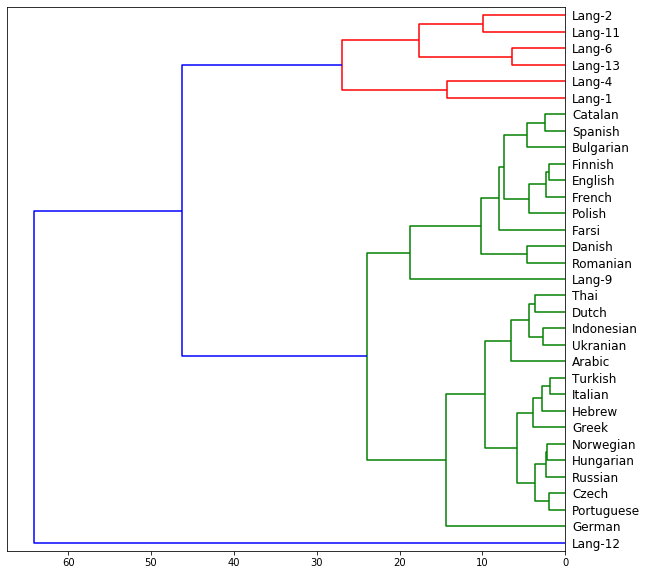

33
34


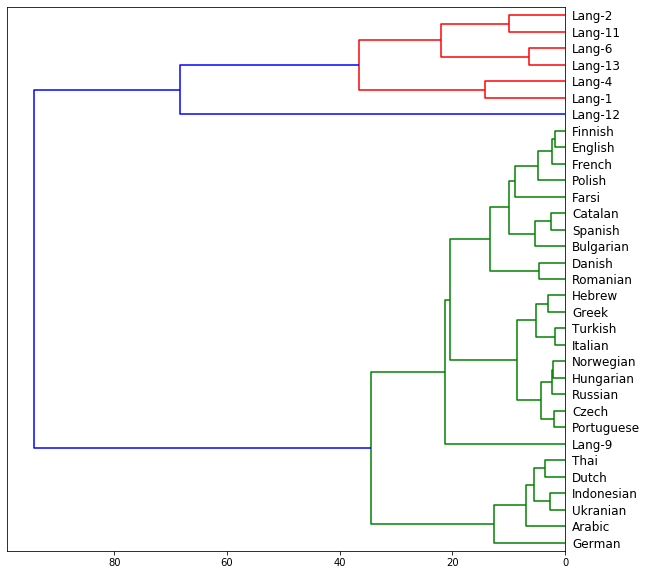

In [74]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# real_files={'sv-cleaned.txt': ['86', '1185', '7183', '0.09', '1.238', '7.523', '5053', '11954', '13455', '35.544', '85.361', '97.557', 8.09170886088493, 13.382880935835267, 3.646325955373697, 3.018551966957245, 2.8416289889664514, 0.3173305046389918, 10.934239111955879, 13.697415800643851, 4.4450962263286895, 10.300248457554048], 'hu-cleaned.txt': ['96', '1403', '8039', '0.097', '1.425', '8.189', '5297', '11794', '13322', '37.016', '84.021', '96.789', 8.443912697661476, 13.287140858210547, 3.770513858709171, 2.7238646271300757, 2.8362712578889697, 0.39224388486901135, 11.279737529255211, 13.674400896445297, 4.6732277276428835, 10.470725275911091], 'ru-cleaned.txt': ['71', '1195', '7203', '0.074', '1.248', '7.539', '5656', '11063', '12149', '43.348', '86.423', '96.774', 8.2912221541863, 13.238854191135788, 3.6971313045475878, 2.274573123645776, 2.869983366497524, 0.29924652798103846, 11.161063017270454, 13.539714482605508, 4.594754914490176, 10.865066361298327], 'ar-cleaned.txt': ['46', '922', '7314', '0.048', '0.973', '7.739', '6627', '14296', '15411', '41.08', '89.901', '98.335', 7.991252535697224, 13.687123045008859, 3.674074700836678, 2.419837377781043, 2.8588159899882046, 0.20474799508696395, 10.849560963814588, 13.896717879341278, 4.318010642513182, 11.19407207025391], 'uk-cleaned.txt': ['97', '1089', '6514', '0.097', '1.096', '6.569', '5274', '11923', '13020', '37.956', '87.207', '96.81', 8.291797413419088, 13.39737612940614, 3.6645599819291084, 2.4661435132330554, 2.7517445199411155, 0.23799633671901013, 11.04320242586163, 13.637250517936284, 4.6274952245085235, 10.851471730289468], 'pt-cleaned.txt': ['103', '1087', '5389', '0.104', '1.103', '5.482', '4567', '12410', '14932', '27.955', '76.923', '93.741', 7.718198064951785, 13.239774890484927, 3.3800687122162065, 3.360611876164954, 2.7210416614557613, 0.5349334146162847, 10.439433233569682, 13.769118972471036, 4.337444525325253, 9.834762603570134], 'en-cleaned.txt': ['53', '981', '5751', '0.053', '0.986', '5.792', '4607', '12605', '15160', '28.188', '78.059', '95.035', 7.8346272472451615, 13.20244079723972, 3.505521758638739, 3.365121531291376, 2.7763835470397313, 0.6427350802581472, 10.609988556701238, 13.838414695290522, 4.329356577815624, 9.795879661091318], 'fi-cleaned.txt': ['71', '1175', '6712', '0.074', '1.23', '7.043', '5995', '10288', '10759', '51.945', '91.06', '97.322', 8.011765645535013, 13.216441774811681, 3.655532951185393, 1.7754225442581437, 2.9665928710214944, 0.14781882222513415, 10.980447782655478, 13.361742417565969, 4.354579911289354, 11.317395773145188], 'de-cleaned.txt': ['98', '1337', '7401', '0.103', '1.413', '7.836', '4529', '11047', '12939', '30.915', '76.476', '90.864', 8.136219894430988, 13.106302226471982, 3.593715724163133, 2.830149538970019, 2.7894502854364154, 0.4513595720346397, 10.926621345341806, 13.558005321129178, 4.542913660548616, 10.218542513626803], 'ro-cleaned.txt': ['146', '1231', '6188', '0.149', '1.256', '6.326', '5419', '12434', '14090', '36.289', '84.184', '96.461', 7.890275384771638, 13.408236229209416, 3.5136544397584046, 2.889259947058672, 2.860415634443262, 0.349335718503567, 10.750542413452806, 13.753596470601854, 4.376022034899159, 10.475298350812757], 'no-cleaned.txt': ['75', '1221', '7041', '0.078', '1.278', '7.387', '4852', '11746', '13503', '33.434', '81.985', '95.482', 8.097550169666674, 13.286395458698715, 3.670348371686557, 2.940893501267083, 2.8703912463340746, 0.3800964672367718, 10.96932961452577, 13.66338449917216, 4.426384790229165, 10.29384773573147], 'it-cleaned.txt': ['95', '850', '4481', '0.096', '0.858', '4.532', '4828', '12338', '14141', '32.427', '83.909', '97.397', 7.4675145702780465, 13.41243660288885, 3.2972187739670473, 3.046498382271916, 2.694476838087352, 0.358281237689992, 10.161978166059091, 13.767813154408985, 4.169553100161342, 10.315797735587406], 'el-cleaned.txt': ['73', '1137', '6989', '0.078', '1.223', '7.53', '4654', '11164', '13175', '33.061', '80.334', '96.049', 8.257338291603864, 13.135357228865978, 3.596928828231832, 3.0612258421513614, 2.69961751826526, 0.4946506159708915, 10.95737210034367, 13.627329111340456, 4.660089582654879, 10.025734157543212], 'tr-cleaned.txt': ['76', '1103', '6311', '0.077', '1.115', '6.383', '5962', '12038', '12998', '44.673', '90.832', '98.769', 8.098666666364913, 13.4174742888232, 3.5629889159636643, 2.1933904150421593, 2.750967923399349, 0.23951745279987535, 10.849857187609759, 13.656729192671738, 4.535381336097156, 11.195798362813925], 'nl-cleaned.txt': ['90', '1082', '6063', '0.094', '1.136', '6.375', '4256', '10582', '12797', '29.255', '73.512', '89.854', 7.8651735865652475, 12.855965918815311, 3.527421581517571, 2.980041630190654, 2.7933564699935816, 0.6270645395319255, 10.659423585146376, 13.475152041152443, 4.337463772978632, 9.841168227661658], 'vi-cleaned.txt': ['95', '288', '2776', '0.232', '0.707', '6.853', '200', '4211', '13039', '1.153', '24.583', '77.058', 6.419721624223565, 11.004614754816304, 2.843940156827122, 5.036639558986322, 2.6105405511532473, 2.4469357071443203, 9.029551543783112, 13.442382633633784, 3.581912314618425, 5.972873825405278], 'bg-cleaned.txt': ['79', '1002', '5992', '0.083', '1.054', '6.319', '5086', '12144', '13879', '34.349', '83.104', '96.255', 7.8802351970603555, 13.350196017502352, 3.52669685333559, 3.184364437843707, 2.787408004737145, 0.37593041939609023, 10.668155285448785, 13.72660431742157, 4.353435707028219, 10.114580143285453], 'he-cleaned.txt': ['71', '680', '5585', '0.073', '0.705', '5.808', '6660', '14766', '15940', '39.57', '89.151', '97.821', 7.881131372195645, 13.718088646722746, 3.6490293671126826, 2.257975852139809, 2.9828111136773527, 0.22364793907671204, 10.863624378053625, 13.94180656669696, 4.232980768816257, 11.372737426855522], 'id-cleaned.txt': ['67', '847', '4924', '0.068', '0.857', '4.991', '3793', '10986', '12827', '27.604', '81.036', '95.917', 7.552741128299203, 13.19268395215795, 3.3134731852788795, 3.0470411621803457, 2.7001039193437117, 0.4219298467456718, 10.253116221404815, 13.611483473333818, 4.238826815974542, 10.093111461293965], 'pl-cleaned.txt': ['94', '1308', '7193', '0.096', '1.343', '7.403', '5146', '11886', '13024', '37.309', '87.487', '97.347', 8.357226099886416, 13.403276880727752, 3.69097626653708, 2.5053057194132338, 2.780430426970078, 0.24736813921111955, 11.136110527585084, 13.647236906819096, 4.667336736122973, 10.825337176092424], 'cs-cleaned.txt': ['106', '1523', '8819', '0.107', '1.533', '8.896', '6085', '12922', '13748', '42.493', '91.399', '98.51', 8.589796219945303, 13.577995061410077, 3.801152539639756, 2.385908406481777, 2.8914810465919127, 0.15831636316669767, 11.480255358664248, 13.736215632877482, 4.789144171042508, 11.129884629021314], 'th-cleaned.txt': ['82', '1519', '11887', '0.093', '1.74', '13.7', '3372', '4631', '4337', '59.345', '89.765', '93.55', 9.068959178988766, 11.887998068607045, 4.136375203259718, 1.5215525860468533, 2.861344415420107, 0.048314803358935364, 11.931564068400593, 11.919469939246529, 4.931507329326201, 9.729039968679668], 'ja-cleaned.txt': ['1764', '22160', '50141', '1.909', '24.115', '54.856', '2009', '2675', '2271', '60.658', '94.757', '97.301', 12.69268261751324, 11.286097827451576, 4.521984507510957, 1.577228175666924, 2.0162774208197836, -0.12688588185842628, 14.727934739292627, 11.123002981774349, 8.160636260308621, 8.68287422069239], 'da-cleaned.txt': ['91', '1253', '7093', '0.094', '1.294', '7.343', '4950', '12007', '13839', '32.239', '79.354', '92.829', 8.03428795044289, 13.24892342510761, 3.6298726122445055, 2.99460141226555, 2.829685876134745, 0.4121203485435054, 10.864641949334144, 13.65777245578156, 4.404197854051458, 10.19406386639535], 'ko-cleaned.txt': ['1341', '12675', '32697', '1.581', '15.003', '38.85', '10499', '18114', '19364', '49.725', '87.128', '94.615', 11.201362886908672, 13.820856085026755, 4.398002050696096, 1.6186924961584503, 2.556565576116569, 0.27119947099068575, 13.758959957990498, 14.103242670990342, 6.802174438343749, 12.107389655994606], 'es-cleaned.txt': ['72', '980', '4991', '0.075', '1.02', '5.203', '4302', '11314', '14279', '27.224', '72.493', '92.649', 7.582985297581789, 12.947427706351203, 3.3341215109792426, 3.5406800803168217, 2.6443202879648635, 0.7857531686673596, 10.226899492106247, 13.723881722932672, 4.248277327718143, 9.368909353235114], 'fa-cleaned.txt': ['61', '907', '5791', '0.062', '0.924', '5.912', '4206', '14383', '17976', '21.655', '75.084', '95.166', 7.814555691503221, 13.434976985358777, 3.6089155791658203, 3.678314852631402, 2.7523694398220613, 0.6416136816800867, 10.567806624352006, 14.091343313436319, 4.205511047041502, 9.70756097110228], 'ca-cleaned.txt': ['104', '1054', '5304', '0.105', '1.063', '5.363', '4381', '12305', '15328', '26.085', '74.265', '93.789', 7.709273626319572, 13.176697065375274, 3.4328329357212017, 3.4551768477717766, 2.6867051969575626, 0.6896312705569551, 10.395352176417852, 13.856035388339057, 4.276559625789414, 9.674342734357621], 'fr-cleaned.txt': ['81', '1075', '5779', '0.082', '1.091', '5.876', '4683', '11902', '14233', '30.062', '77.522', '94.084', 7.77762633227321, 13.218063778673002, 3.4473716411610464, 3.2772429732467354, 2.6812357301721974, 0.5320685845174435, 10.459298564122298, 13.743837517406709, 4.329752573390447, 9.88554025537931], 'zh-cleaned.txt': ['2587', '31330', '54029', '3.561', '43.481', '75.6', '2446', '3098', '2609', '63.582', '95.089', '97.752', 13.585468728327685, 11.454128515912057, 4.451188721103145, 1.5055973203188615, 1.5100099104784686, -0.14064022550643124, 15.10227004283495, 11.313160680071453, 9.137565199134038, 8.839867395977846]}
# fake_files= {'cpp-cleaned.txt': ['92', '1616', '4927', '0.092', '1.616', '4.926', '1494', '2856', '3453', '13.205', '25.245', '30.525', 8.620079052459579, 10.343826224433217, 3.3539547459471173, 2.001307079272228, 1.5598796989834196, 0.553126190805034, 10.179975212973194, 10.896676436833749, 5.266130321186844, 8.342971973719473], 'protein-100k-cleaned.txt': ['21', '401', '7819', '0.018', '0.346', '6.803', '584', '1165', '582', '19.61', '58.69', '58.669', 8.333996888013766, 10.128726818478688, 4.150527340878508, 3.9820296908162662, 4.046297968856993, -1.0007269816434379, 12.381300959647966, 9.127583407161067, 4.183789125382607, 4.625446804078556], 'haskell-cleaned.txt': ['117', '2239', '9120', '0.117', '2.239', '9.118', '3734', '9103', '11080', '27.766', '67.695', '82.404', 8.982043142500167, 12.69206143997818, 3.8945401535635003, 2.776349132042055, 2.4656331052056273, 0.5314954317215937, 11.447651672968957, 13.223480794406433, 5.087517295984849, 9.915994832602019], 'fortran-cleaned.txt': ['83', '1621', '7173', '0.083', '1.621', '7.173', '2576', '6989', '9601', '13.733', '37.261', '51.189', 8.863872039520317, 11.71968932662056, 3.741802537856948, 2.939202231055471, 2.163254261706609, 0.9107537735305307, 11.027130391949626, 12.630311118270411, 5.122076247578447, 8.780775758071856], 'dna-100k-cleaned.txt': ['5', '20', '72', '0.005', '0.021', '0.076', '1632', '3261', '1630', '32.956', '98.788', '98.788', 3.9553382900296143, 11.662325850969081, 1.9487945435695633, 4.747892314013221, 1.9395604077333, -1.0004371140893797, 5.894633911704974, 10.661880748524496, 2.0065995108264754, 5.137487327803134], 'java-cleaned.txt': ['89', '1090', '3046', '0.089', '1.09', '3.046', '985', '1953', '2811', '9.079', '18.003', '25.915', 8.701063417287237, 9.878328428326306, 3.4119508937209693, 2.125167876597256, 1.5544053928014647, 0.8087407449573538, 10.255451818733045, 10.686744031490091, 5.289119146965033, 7.753681531902107]}
# unknown_files= {'1.txt': ['28', '435', '2328', '0.06', '0.966', '5.4', '1612', '8108', '11865', '8.356', '46.721', '76.965', 3.8114634225963826, 6.923612005795293, 9.466953874836863, 3.145256826039843, 2.5786250083106865, 7.177199821601062, 11.82680776416384, 13.227819336745547, 4.218338999701869, 1.211333353739239], '10.txt': ['78', '4681', '21410', '0.24', '15.429', '75.925', '6910', '9058', '6920', '61.674', '99.956', '100.0', 5.698247327362059, 11.138372722173097, 14.207333356453645, 5.475675075607388, 3.1571315086563945, 9.21883105170624, 13.144730968186087, 12.756556322524089, 2.3110447577246114, -0.3881904009661264], '11.txt': ['75', '1289', '4416', '0.161', '2.881', '10.323', '458', '7431', '9332', '3.397', '64.539', '97.748', 5.547145410668168, 9.322367628437243, 10.763079737634648, 3.799974849707217, 1.4705035488798568, 6.809114612938958, 12.232263492381884, 13.170050634105086, 4.73429639812416, 0.5585899413106401], '12.txt': ['11', '120', '880', '0.026', '0.3', '2.379', '592', '3677', '6132', '3.367', '25.27', '53.234', 3.079201801492162, 5.7098855625653915, 7.650662333571914, 2.638750083077402, 1.9943382305920345, 5.642641471533023, 9.818372580635902, 11.651107663852795, 3.5283650640656288, 1.5559907398029493], '13.txt': ['71', '817', '4649', '0.066', '0.771', '4.465', '3454', '14340', '18978', '14.207', '63.986', '92.53', 4.352915708709991, 7.742463698175724, 10.328247763606262, 3.397190459333495, 2.5826392806858505, 8.596364587178924, 13.164016271120428, 14.130743801735955, 4.150355723448106, 0.8310600852436263], '2.txt': ['77', '1393', '5147', '0.162', '3.062', '11.836', '523', '8872', '9922', '3.739', '74.038', '99.439', 5.630922622004902, 9.934380267345846, 11.647357771295546, 4.327789872549698, 1.751676307908929, 7.562491434722128, 12.809157591938227, 13.272856328531077, 4.450225230059887, 0.1818642686517536], '3.txt': ['870', '1613', '3566', '4.839', '9.807', '23.636', '871', '3310', '4794', '6.456', '28.478', '49.149', 4.693147735554595, 7.772854556234202, 9.74970055875431, 3.228795354620361, 1.8322409935945139, 6.056522097551614, 9.959649352592939, 11.487777489702054, 3.3877964785695323, 0.8793750074258652], '4.txt': ['76', '1234', '3650', '0.142', '2.408', '7.432', '432', '5373', '9473', '2.882', '41.826', '88.5', 5.404060111916638, 8.33378293901293, 9.496008397990886, 2.956298086899417, 1.1813351090132418, 5.887098805296996, 11.184944661814882, 13.091460698543163, 4.784219183535647, 1.49730098101033], '5.txt': ['77', '4727', '22110', '0.228', '15.017', '75.662', '7186', '9452', '7197', '61.361', '99.979', '100.0', 5.70515741756499, 11.159041124778353, 14.250501342086071, 5.48940343032571, 3.179242640264882, 9.219374719365373, 13.20628604802588, 12.81317994301459, 2.3530121690516608, -0.3935292063440598], '6.txt': ['99', '2002', '11952', '0.042', '0.87', '5.262', '7365', '30898', '42362', '13.573', '60.284', '87.802', 4.852936893465496, 8.481641724999038, 11.230424530176123, 3.6360585798691716, 2.7543470544929045, 9.447373462873042, 14.073670900311875, 15.188507100280399, 4.316887815124535, 1.0417506326480859], '7.txt': ['2374', '22603', '40835', '4.083', '39.435', '72.282', '5104', '6419', '5855', '67.495', '95.28', '99.036', 8.943819069379002, 13.269681333518417, 14.883841221656997, 4.340353449970178, 1.6103017552939805, 10.34598096583313, 12.532837235097169, 12.500599053745931, 1.3113203792081305, -0.029172607029452492], '8.txt': ['77', '4587', '19926', '0.259', '16.511', '77.289', '6352', '8356', '6355', '61.331', '100.0', '100.0', 5.702209133724757, 11.13754531029953, 14.11958097393613, 5.471870027451177, 3.0684252899143423, 9.099836867566127, 13.028596777067108, 12.63367640989232, 2.3176091727574346, -0.3949203671747516], '9.txt': ['104', '1223', '6786', '0.118', '1.387', '7.716', '4671', '10585', '12250', '33.655', '77.586', '91.37', 4.688304228957838, 8.210032096308796, 10.88908214802002, 3.52897059712392, 2.685923834634916, 10.042308139975141, 13.085665102584924, 13.520971732211754, 2.9713212590311233, 0.4374216106089418]}

real_files= {'sv-cleaned.txt': ['0.09', '1.238', '7.523', '35.544', '85.361', '97.557', 8.09170886088493, 13.382880935835267, 3.646325955373697, 3.018551966957245, 2.8416289889664514, 0.3173305046389918, 10.934239111955879, 13.697415800643851, 4.4450962263286895, 10.300248457554048, 0.0997448677486328, 0.3917117315574861, 0.809261944192522], 'hu-cleaned.txt': ['0.097', '1.425', '8.189', '37.016', '84.021', '96.789', 8.443912697661476, 13.287140858210547, 3.770513858709171, 2.7238646271300757, 2.8362712578889697, 0.39224388486901135, 11.279737529255211, 13.674400896445297, 4.6732277276428835, 10.470725275911091, 0.14593424622474413, 0.47376969571274963, 0.9518526152149807], 'ru-cleaned.txt': ['0.074', '1.248', '7.539', '43.348', '86.423', '96.774', 8.2912221541863, 13.238854191135788, 3.6971313045475878, 2.274573123645776, 2.869983366497524, 0.29924652798103846, 11.161063017270454, 13.539714482605508, 4.594754914490176, 10.865066361298327, 0.7965170783890145, 2.1681513521826736, 4.249326177109469], 'ar-cleaned.txt': ['0.048', '0.973', '7.739', '41.08', '89.901', '98.335', 7.991252535697224, 13.687123045008859, 3.674074700836678, 2.419837377781043, 2.8588159899882046, 0.20474799508696395, 10.849560963814588, 13.896717879341278, 4.318010642513182, 11.19407207025391, 0.007801116227059639, 0.10246797622388057, 0.28909299562230645], 'uk-cleaned.txt': ['0.097', '1.096', '6.569', '37.956', '87.207', '96.81', 8.291797413419088, 13.39737612940614, 3.6645599819291084, 2.4661435132330554, 2.7517445199411155, 0.23799633671901013, 11.04320242586163, 13.637250517936284, 4.6274952245085235, 10.851471730289468, 0.03712940790999721, 0.22590595554058673, 0.5724954937837858], 'pt-cleaned.txt': ['0.104', '1.103', '5.482', '27.955', '76.923', '93.741', 7.718198064951785, 13.239774890484927, 3.3800687122162065, 3.360611876164954, 2.7210416614557613, 0.5349334146162847, 10.439433233569682, 13.769118972471036, 4.337444525325253, 9.834762603570134, 0.05775841497324602, 0.3190647297350594, 0.7404158519268658], 'en-cleaned.txt': ['0.053', '0.986', '5.792', '28.188', '78.059', '95.035', 7.8346272472451615, 13.20244079723972, 3.505521758638739, 3.365121531291376, 2.7763835470397313, 0.6427350802581472, 10.609988556701238, 13.838414695290522, 4.329356577815624, 9.795879661091318, 0.0030595574654149506, 0.05782941067203794, 0.17669037709486565], 'fi-cleaned.txt': ['0.074', '1.23', '7.043', '51.945', '91.06', '97.322', 8.011765645535013, 13.216441774811681, 3.655532951185393, 1.7754225442581437, 2.9665928710214944, 0.14781882222513415, 10.980447782655478, 13.361742417565969, 4.354579911289354, 11.317395773145188, 0.15393439395627306, 0.6075866761820885, 1.2309177233060353], 'de-cleaned.txt': ['0.103', '1.413', '7.836', '30.915', '76.476', '90.864', 8.136219894430988, 13.106302226471982, 3.593715724163133, 2.830149538970019, 2.7894502854364154, 0.4513595720346397, 10.926621345341806, 13.558005321129178, 4.542913660548616, 10.218542513626803, 0.6654109627397315, 1.978186244885717, 3.660543046705363], 'ro-cleaned.txt': ['0.149', '1.256', '6.326', '36.289', '84.184', '96.461', 7.890275384771638, 13.408236229209416, 3.5136544397584046, 2.889259947058672, 2.860415634443262, 0.349335718503567, 10.750542413452806, 13.753596470601854, 4.376022034899159, 10.475298350812757, 0.007110885918505099, 0.11114807199664178, 0.3364875544272483], 'no-cleaned.txt': ['0.078', '1.278', '7.387', '33.434', '81.985', '95.482', 8.097550169666674, 13.286395458698715, 3.670348371686557, 2.940893501267083, 2.8703912463340746, 0.3800964672367718, 10.96932961452577, 13.66338449917216, 4.426384790229165, 10.29384773573147, 0.09685369476195754, 0.4046667078345635, 0.8769792993521448], 'it-cleaned.txt': ['0.096', '0.858', '4.532', '32.427', '83.909', '97.397', 7.4675145702780465, 13.41243660288885, 3.2972187739670473, 3.046498382271916, 2.694476838087352, 0.358281237689992, 10.161978166059091, 13.767813154408985, 4.169553100161342, 10.315797735587406, 0.025265253940940112, 0.18188301006686022, 0.46968383368890954], 'el-cleaned.txt': ['0.078', '1.223', '7.53', '33.061', '80.334', '96.049', 8.257338291603864, 13.135357228865978, 3.596928828231832, 3.0612258421513614, 2.69961751826526, 0.4946506159708915, 10.95737210034367, 13.627329111340456, 4.660089582654879, 10.025734157543212, 0.15471002111944562, 0.5614240623351792, 1.1537434870154584], 'tr-cleaned.txt': ['0.077', '1.115', '6.383', '44.673', '90.832', '98.769', 8.098666666364913, 13.4174742888232, 3.5629889159636643, 2.1933904150421593, 2.750967923399349, 0.23951745279987535, 10.849857187609759, 13.656729192671738, 4.535381336097156, 11.195798362813925, 0.21003166464050105, 0.6643496351352024, 1.3060636742159557], 'nl-cleaned.txt': ['0.094', '1.136', '6.375', '29.255', '73.512', '89.854', 7.8651735865652475, 12.855965918815311, 3.527421581517571, 2.980041630190654, 2.7933564699935816, 0.6270645395319255, 10.659423585146376, 13.475152041152443, 4.337463772978632, 9.841168227661658, 0.03189461021080991, 0.19553995806195662, 0.4583992387307999], 'vi-cleaned.txt': ['0.232', '0.707', '6.853', '1.153', '24.583', '77.058', 6.419721624223565, 11.004614754816304, 2.843940156827122, 5.036639558986322, 2.6105405511532473, 2.4469357071443203, 9.029551543783112, 13.442382633633784, 3.581912314618425, 5.972873825405278], 'bg-cleaned.txt': ['0.083', '1.054', '6.319', '34.349', '83.104', '96.255', 7.8802351970603555, 13.350196017502352, 3.52669685333559, 3.184364437843707, 2.787408004737145, 0.37593041939609023, 10.668155285448785, 13.72660431742157, 4.353435707028219, 10.114580143285453, 0.032341952988727406, 0.2417213547904752, 0.6023178072033786], 'he-cleaned.txt': ['0.073', '0.705', '5.808', '39.57', '89.151', '97.821', 7.881131372195645, 13.718088646722746, 3.6490293671126826, 2.257975852139809, 2.9828111136773527, 0.22364793907671204, 10.863624378053625, 13.94180656669696, 4.232980768816257, 11.372737426855522, 0.026932986518001127, 0.22036619811947128, 0.5340034459954867], 'id-cleaned.txt': ['0.068', '0.857', '4.991', '27.604', '81.036', '95.917', 7.552741128299203, 13.19268395215795, 3.3134731852788795, 3.0470411621803457, 2.7001039193437117, 0.4219298467456718, 10.253116221404815, 13.611483473333818, 4.238826815974542, 10.093111461293965, 0.09519836016016336, 0.3022491455955082, 0.7494874863634842], 'pl-cleaned.txt': ['0.096', '1.343', '7.403', '37.309', '87.487', '97.347', 8.357226099886416, 13.403276880727752, 3.69097626653708, 2.5053057194132338, 2.780430426970078, 0.24736813921111955, 11.136110527585084, 13.647236906819096, 4.667336736122973, 10.825337176092424, 0.3189577587895789, 0.9597437957461566, 1.8358813737325397], 'cs-cleaned.txt': ['0.107', '1.533', '8.896', '42.493', '91.399', '98.51', 8.589796219945303, 13.577995061410077, 3.801152539639756, 2.385908406481777, 2.8914810465919127, 0.15831636316669767, 11.480255358664248, 13.736215632877482, 4.789144171042508, 11.129884629021314, 0.08578196618888918, 0.32565866968013, 0.6878040756701389], 'th-cleaned.txt': ['0.093', '1.74', '13.7', '59.345', '89.765', '93.55', 9.068959178988766, 11.887998068607045, 4.136375203259718, 1.5215525860468533, 2.861344415420107, 0.048314803358935364, 11.931564068400593, 11.919469939246529, 4.931507329326201, 9.729039968679668], 'ja-cleaned.txt': ['1.909', '24.115', '54.856', '60.658', '94.757', '97.301', 12.69268261751324, 11.286097827451576, 4.521984507510957, 1.577228175666924, 2.0162774208197836, -0.12688588185842628, 14.727934739292627, 11.123002981774349, 8.160636260308621, 8.68287422069239], 'da-cleaned.txt': ['0.094', '1.294', '7.343', '32.239', '79.354', '92.829', 8.03428795044289, 13.24892342510761, 3.6298726122445055, 2.99460141226555, 2.829685876134745, 0.4121203485435054, 10.864641949334144, 13.65777245578156, 4.404197854051458, 10.19406386639535, 1.2082760635827507, 3.356003310230207, 5.944714684373797], 'ko-cleaned.txt': ['1.581', '15.003', '38.85', '49.725', '87.128', '94.615', 11.201362886908672, 13.820856085026755, 4.398002050696096, 1.6186924961584503, 2.556565576116569, 0.27119947099068575, 13.758959957990498, 14.103242670990342, 6.802174438343749, 12.107389655994606], 'es-cleaned.txt': ['0.075', '1.02', '5.203', '27.224', '72.493', '92.649', 7.582985297581789, 12.947427706351203, 3.3341215109792426, 3.5406800803168217, 2.6443202879648635, 0.7857531686673596, 10.226899492106247, 13.723881722932672, 4.248277327718143, 9.368909353235114, 0.00634012169984389, 0.15948577920101395, 0.4636577317016423], 'fa-cleaned.txt': ['0.062', '0.924', '5.912', '21.655', '75.084', '95.166', 7.814555691503221, 13.434976985358777, 3.6089155791658203, 3.678314852631402, 2.7523694398220613, 0.6416136816800867, 10.567806624352006, 14.091343313436319, 4.205511047041502, 9.70756097110228, 0.06371119108514053, 0.31602634460850815, 0.7328183566599521], 'ca-cleaned.txt': ['0.105', '1.063', '5.363', '26.085', '74.265', '93.789', 7.709273626319572, 13.176697065375274, 3.4328329357212017, 3.4551768477717766, 2.6867051969575626, 0.6896312705569551, 10.395352176417852, 13.856035388339057, 4.276559625789414, 9.674342734357621, 0.08205789634108197, 0.30754646424008203, 0.6221306546606787], 'fr-cleaned.txt': ['0.082', '1.091', '5.876', '30.062', '77.522', '94.084', 7.77762633227321, 13.218063778673002, 3.4473716411610464, 3.2772429732467354, 2.6812357301721974, 0.5320685845174435, 10.459298564122298, 13.743837517406709, 4.329752573390447, 9.88554025537931, 0.07170841733869143, 0.3873738348986171, 0.8376701370704291], 'zh-cleaned.txt': ['3.561', '43.481', '75.6', '63.582', '95.089', '97.752', 13.585468728327685, 11.454128515912057, 4.451188721103145, 1.5055973203188615, 1.5100099104784686, -0.14064022550643124, 15.10227004283495, 11.313160680071453, 9.137565199134038, 8.839867395977846]}
fake_files={'cpp-cleaned.txt': ['0.092', '1.616', '4.926', '13.205', '25.245', '30.525', 8.620079052459579, 10.343826224433217, 3.3539547459471173, 2.001307079272228, 1.5598796989834196, 0.553126190805034, 10.179975212973194, 10.896676436833749, 5.266130321186844, 8.342971973719473], 'protein-100k-cleaned.txt': ['0.018', '0.346', '6.803', '19.61', '58.69', '58.669', 8.333996888013766, 10.128726818478688, 4.150527340878508, 3.9820296908162662, 4.046297968856993, -1.0007269816434379, 12.381300959647966, 9.127583407161067, 4.183789125382607, 4.625446804078556], 'haskell-cleaned.txt': ['0.117', '2.239', '9.118', '27.766', '67.695', '82.404', 8.982043142500167, 12.69206143997818, 3.8945401535635003, 2.776349132042055, 2.4656331052056273, 0.5314954317215937, 11.447651672968957, 13.223480794406433, 5.087517295984849, 9.915994832602019], 'fortran-cleaned.txt': ['0.083', '1.621', '7.173', '13.733', '37.261', '51.189', 8.863872039520317, 11.71968932662056, 3.741802537856948, 2.939202231055471, 2.163254261706609, 0.9107537735305307, 11.027130391949626, 12.630311118270411, 5.122076247578447, 8.780775758071856], 'dna-100k-cleaned.txt': ['0.005', '0.021', '0.076', '32.956', '98.788', '98.788', 3.9553382900296143, 11.662325850969081, 1.9487945435695633, 4.747892314013221, 1.9395604077333, -1.0004371140893797, 5.894633911704974, 10.661880748524496, 2.0065995108264754, 5.137487327803134], 'java-cleaned.txt': ['0.089', '1.09', '3.046', '9.079', '18.003', '25.915', 8.701063417287237, 9.878328428326306, 3.4119508937209693, 2.125167876597256, 1.5544053928014647, 0.8087407449573538, 10.255451818733045, 10.686744031490091, 5.289119146965033, 7.753681531902107], 'rand-seq.txt': ['0.053', '2.809', '72.738', '99.342', '100.0', '100.0', 11.435353062703454, 10.831307243802051, 5.707799406848028, 0.012418203843854558, 4.582774515430968, -0.0015845087159921045, 16.018128695357273, 10.82972273508606, 5.727553752224563, 10.817807900675527], 'rand-distro-seq.txt': ['0.055', '1.666', '15.843', '67.52', '98.015', '99.98', 8.502260800245516, 13.852205076676062, 4.221759834259966, 1.7696549104433814, 4.000685522320485, 0.05016174611174519, 12.502956771679393, 13.90236019765768, 4.280490265116245, 12.082657291363553]}
unknown_files= {'1.txt': ['0.06', '0.966', '5.4', '8.356', '46.721', '76.965', 3.8114634225963826, 6.923612005795293, 9.466953874836863, 3.145256826039843, 2.5786250083106865, 7.177199821601062, 11.82680776416384, 13.227819336745547, 4.218338999701869, 1.211333353739239, 0.12698634155821592, 0.602914522629661, 1.5476127685853984], \
                '10.txt': ['0.24', '15.429', '75.925', '61.674', '99.956', '100.0', 5.698247327362059, 11.138372722173097, 14.207333356453645, 5.475675075607388, 3.1571315086563945, 9.21883105170624, 13.144730968186087, 12.756556322524089, 2.3110447577246114, -0.3881904009661264, 0.00951403381833037, 0.1738517961323124, 0],\
                '11.txt': ['0.161', '2.881', '10.323', '3.397', '64.539', '97.748', 5.547145410668168, 9.322367628437243, 10.763079737634648, 3.799974849707217, 1.4705035488798568, 6.809114612938958, 12.232263492381884, 13.170050634105086, 4.73429639812416, 0.5585899413106401, 0.02607474339984571, 0.1988078006366434, 0.472],\
                '12.txt': ['0.026', '0.3', '2.379', '3.367', '25.27', '53.234', 3.079201801492162, 5.7098855625653915, 7.650662333571914, 2.638750083077402, 1.9943382305920345, 5.642641471533023, 9.818372580635902, 11.651107663852795, 3.5283650640656288, 1.5559907398029493, 0.021367067151147716, 0.14882387103695394, 0.462], \
                '13.txt': ['0.066', '0.771', '4.465', '14.207', '63.986', '92.53', 4.352915708709991, 7.742463698175724, 10.328247763606262, 3.397190459333495, 2.5826392806858505, 8.596364587178924, 13.164016271120428, 14.130743801735955, 4.150355723448106, 0.8310600852436263, 0.11749058542745963, 0.4559290870434196, 0.9558674238351156],\
                '2.txt': ['0.162', '3.062', '11.836', '3.739', '74.038', '99.439', 5.630922622004902, 9.934380267345846, 11.647357771295546, 4.327789872549698, 1.751676307908929, 7.562491434722128, 12.809157591938227, 13.272856328531077, 4.450225230059887, 0.1818642686517536, 0.0048302800768622485, 0.13704848881076306, 0.381],\
                '3.txt': ['4.839', '9.807', '23.636', '6.456', '28.478', '49.149', 4.693147735554595, 7.772854556234202, 9.74970055875431, 3.228795354620361, 1.8322409935945139, 6.056522097551614, 9.959649352592939, 11.487777489702054, 3.3877964785695323, 0.8793750074258652, 0.6228829090204274, 0, 0], \
                '4.txt': ['0.142', '2.408', '7.432', '2.882', '41.826', '88.5', 5.404060111916638, 8.33378293901293, 9.496008397990886, 2.956298086899417, 1.1813351090132418, 5.887098805296996, 11.184944661814882, 13.091460698543163, 4.784219183535647, 1.49730098101033, 0.0015673426932907844, 0.15514034013016584, 0.435],\
                '5.txt': ['0.228', '15.017', '75.662', '61.361', '99.979', '100.0', 5.70515741756499, 11.159041124778353, 14.250501342086071, 5.48940343032571, 3.179242640264882, 9.219374719365373, 13.20628604802588, 12.81317994301459, 2.3530121690516608, -0.3935292063440598, 0.0008319292766872828, 0.13479567252113372, 0],\
                '6.txt': ['0.042', '0.87', '5.262', '13.573', '60.284', '87.802', 4.852936893465496, 8.481641724999038, 11.230424530176123, 3.6360585798691716, 2.7543470544929045, 9.447373462873042, 14.073670900311875, 15.188507100280399, 4.316887815124535, 1.0417506326480859, 0.07159128507623533, 0.31526962588668894, 0.7364945082736112],\
                '7.txt': ['4.083', '39.435', '72.282', '67.495', '95.28', '99.036', 8.943819069379002, 13.269681333518417, 14.883841221656997, 4.340353449970178, 1.6103017552939805, 10.34598096583313, 12.532837235097169, 12.500599053745931, 1.3113203792081305, -0.029172607029452492, 0.11032906742962982, 0.40355232884878395, 0.8999253947607416],\
                '8.txt': ['0.259', '16.511', '77.289', '61.331', '100.0', '100.0', 5.702209133724757, 11.13754531029953, 14.11958097393613, 5.471870027451177, 3.0684252899143423, 9.099836867566127, 13.028596777067108, 12.63367640989232, 2.3176091727574346, -0.3949203671747516, 0.026190385796766052, 0.20706210646789497, 0],\
                '9.txt': ['0.118', '1.387', '7.716', '33.655', '77.586', '91.37', 4.688304228957838, 8.210032096308796, 10.88908214802002, 3.52897059712392, 2.685923834634916, 10.042308139975141, 13.085665102584924, 13.520971732211754, 2.9713212590311233, 0.4374216106089418, 0.08642055683140246, 0.35909639059484355, 0.7615200300898299]}
countries={"ar":"Arabic", "bg":"Bulgarian", "ca":"Catalan", "cs":"Czech", "da":"Danish", "de":"German", "el":"Greek", "en":"English", "es":"Spanish", "fa":"Farsi", "fi":"Finnish", "fr":"French", "he":"Hebrew", "hu":"Hungarian", "id":"Indonesian", "it":"Italian", "ja":"Japanese", "ko":"Korean", "nl":"Dutch", "no":"Norwegian", "pl":"Polish", "pt":"Portuguese", "ro":"Romanian", "ru":"Russian", "sv":"Swedish", "th":"Thai", "tr":"Turkish", "uk":"Ukranian", "vi":"Vietnamese", "zh":"Chinese"}

X=[]   
for elem in real_files:
    if elem[:2] not in ['zh','vi','ja','ko','th']:
        X.append(list(real_files[elem]))


for elem in unknown_files:
    f=elem.replace('.txt','')
    if f not in ['3','5','8','10','7']:
        X.append([float(i) for i in unknown_files[elem]])
        
linked = linkage(X, 'weighted')

labelList = [countries[elem.replace('-cleaned.txt','')]  for elem in real_files if elem[:2] not in ['zh','vi','ja','ko'] ]
# labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files if elem.replace('.txt','') not in ['3','5','8','10','7']])
print(len(X))
print(len(labelList))
plt.figure(figsize=(10,10))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,leaf_font_size=12)
plt.show()

linked = linkage(X, 'complete')

labelList = [countries[elem.replace('-cleaned.txt','')]  for elem in real_files if elem[:2] not in ['zh','vi','ja','ko'] ]
# labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files if elem.replace('.txt','') not in ['3','5','8','10','7']])
print(len(X))
print(len(labelList))
plt.figure(figsize=(10,10))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,leaf_font_size=12)
plt.show()


33
42


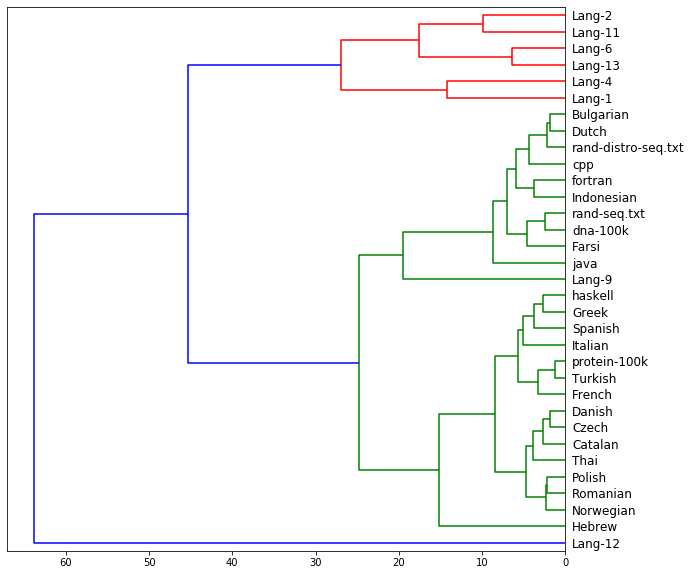

33
42


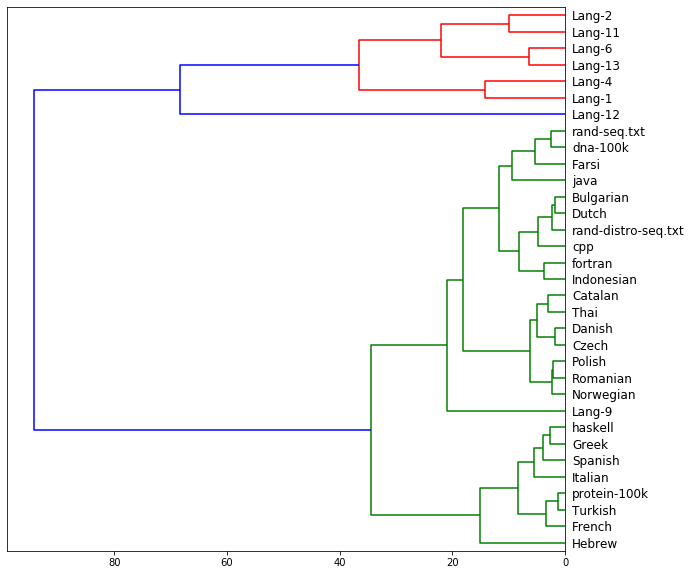

In [76]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# real_files={'sv-cleaned.txt': ['86', '1185', '7183', '0.09', '1.238', '7.523', '5053', '11954', '13455', '35.544', '85.361', '97.557', 8.09170886088493, 13.382880935835267, 3.646325955373697, 3.018551966957245, 2.8416289889664514, 0.3173305046389918, 10.934239111955879, 13.697415800643851, 4.4450962263286895, 10.300248457554048], 'hu-cleaned.txt': ['96', '1403', '8039', '0.097', '1.425', '8.189', '5297', '11794', '13322', '37.016', '84.021', '96.789', 8.443912697661476, 13.287140858210547, 3.770513858709171, 2.7238646271300757, 2.8362712578889697, 0.39224388486901135, 11.279737529255211, 13.674400896445297, 4.6732277276428835, 10.470725275911091], 'ru-cleaned.txt': ['71', '1195', '7203', '0.074', '1.248', '7.539', '5656', '11063', '12149', '43.348', '86.423', '96.774', 8.2912221541863, 13.238854191135788, 3.6971313045475878, 2.274573123645776, 2.869983366497524, 0.29924652798103846, 11.161063017270454, 13.539714482605508, 4.594754914490176, 10.865066361298327], 'ar-cleaned.txt': ['46', '922', '7314', '0.048', '0.973', '7.739', '6627', '14296', '15411', '41.08', '89.901', '98.335', 7.991252535697224, 13.687123045008859, 3.674074700836678, 2.419837377781043, 2.8588159899882046, 0.20474799508696395, 10.849560963814588, 13.896717879341278, 4.318010642513182, 11.19407207025391], 'uk-cleaned.txt': ['97', '1089', '6514', '0.097', '1.096', '6.569', '5274', '11923', '13020', '37.956', '87.207', '96.81', 8.291797413419088, 13.39737612940614, 3.6645599819291084, 2.4661435132330554, 2.7517445199411155, 0.23799633671901013, 11.04320242586163, 13.637250517936284, 4.6274952245085235, 10.851471730289468], 'pt-cleaned.txt': ['103', '1087', '5389', '0.104', '1.103', '5.482', '4567', '12410', '14932', '27.955', '76.923', '93.741', 7.718198064951785, 13.239774890484927, 3.3800687122162065, 3.360611876164954, 2.7210416614557613, 0.5349334146162847, 10.439433233569682, 13.769118972471036, 4.337444525325253, 9.834762603570134], 'en-cleaned.txt': ['53', '981', '5751', '0.053', '0.986', '5.792', '4607', '12605', '15160', '28.188', '78.059', '95.035', 7.8346272472451615, 13.20244079723972, 3.505521758638739, 3.365121531291376, 2.7763835470397313, 0.6427350802581472, 10.609988556701238, 13.838414695290522, 4.329356577815624, 9.795879661091318], 'fi-cleaned.txt': ['71', '1175', '6712', '0.074', '1.23', '7.043', '5995', '10288', '10759', '51.945', '91.06', '97.322', 8.011765645535013, 13.216441774811681, 3.655532951185393, 1.7754225442581437, 2.9665928710214944, 0.14781882222513415, 10.980447782655478, 13.361742417565969, 4.354579911289354, 11.317395773145188], 'de-cleaned.txt': ['98', '1337', '7401', '0.103', '1.413', '7.836', '4529', '11047', '12939', '30.915', '76.476', '90.864', 8.136219894430988, 13.106302226471982, 3.593715724163133, 2.830149538970019, 2.7894502854364154, 0.4513595720346397, 10.926621345341806, 13.558005321129178, 4.542913660548616, 10.218542513626803], 'ro-cleaned.txt': ['146', '1231', '6188', '0.149', '1.256', '6.326', '5419', '12434', '14090', '36.289', '84.184', '96.461', 7.890275384771638, 13.408236229209416, 3.5136544397584046, 2.889259947058672, 2.860415634443262, 0.349335718503567, 10.750542413452806, 13.753596470601854, 4.376022034899159, 10.475298350812757], 'no-cleaned.txt': ['75', '1221', '7041', '0.078', '1.278', '7.387', '4852', '11746', '13503', '33.434', '81.985', '95.482', 8.097550169666674, 13.286395458698715, 3.670348371686557, 2.940893501267083, 2.8703912463340746, 0.3800964672367718, 10.96932961452577, 13.66338449917216, 4.426384790229165, 10.29384773573147], 'it-cleaned.txt': ['95', '850', '4481', '0.096', '0.858', '4.532', '4828', '12338', '14141', '32.427', '83.909', '97.397', 7.4675145702780465, 13.41243660288885, 3.2972187739670473, 3.046498382271916, 2.694476838087352, 0.358281237689992, 10.161978166059091, 13.767813154408985, 4.169553100161342, 10.315797735587406], 'el-cleaned.txt': ['73', '1137', '6989', '0.078', '1.223', '7.53', '4654', '11164', '13175', '33.061', '80.334', '96.049', 8.257338291603864, 13.135357228865978, 3.596928828231832, 3.0612258421513614, 2.69961751826526, 0.4946506159708915, 10.95737210034367, 13.627329111340456, 4.660089582654879, 10.025734157543212], 'tr-cleaned.txt': ['76', '1103', '6311', '0.077', '1.115', '6.383', '5962', '12038', '12998', '44.673', '90.832', '98.769', 8.098666666364913, 13.4174742888232, 3.5629889159636643, 2.1933904150421593, 2.750967923399349, 0.23951745279987535, 10.849857187609759, 13.656729192671738, 4.535381336097156, 11.195798362813925], 'nl-cleaned.txt': ['90', '1082', '6063', '0.094', '1.136', '6.375', '4256', '10582', '12797', '29.255', '73.512', '89.854', 7.8651735865652475, 12.855965918815311, 3.527421581517571, 2.980041630190654, 2.7933564699935816, 0.6270645395319255, 10.659423585146376, 13.475152041152443, 4.337463772978632, 9.841168227661658], 'vi-cleaned.txt': ['95', '288', '2776', '0.232', '0.707', '6.853', '200', '4211', '13039', '1.153', '24.583', '77.058', 6.419721624223565, 11.004614754816304, 2.843940156827122, 5.036639558986322, 2.6105405511532473, 2.4469357071443203, 9.029551543783112, 13.442382633633784, 3.581912314618425, 5.972873825405278], 'bg-cleaned.txt': ['79', '1002', '5992', '0.083', '1.054', '6.319', '5086', '12144', '13879', '34.349', '83.104', '96.255', 7.8802351970603555, 13.350196017502352, 3.52669685333559, 3.184364437843707, 2.787408004737145, 0.37593041939609023, 10.668155285448785, 13.72660431742157, 4.353435707028219, 10.114580143285453], 'he-cleaned.txt': ['71', '680', '5585', '0.073', '0.705', '5.808', '6660', '14766', '15940', '39.57', '89.151', '97.821', 7.881131372195645, 13.718088646722746, 3.6490293671126826, 2.257975852139809, 2.9828111136773527, 0.22364793907671204, 10.863624378053625, 13.94180656669696, 4.232980768816257, 11.372737426855522], 'id-cleaned.txt': ['67', '847', '4924', '0.068', '0.857', '4.991', '3793', '10986', '12827', '27.604', '81.036', '95.917', 7.552741128299203, 13.19268395215795, 3.3134731852788795, 3.0470411621803457, 2.7001039193437117, 0.4219298467456718, 10.253116221404815, 13.611483473333818, 4.238826815974542, 10.093111461293965], 'pl-cleaned.txt': ['94', '1308', '7193', '0.096', '1.343', '7.403', '5146', '11886', '13024', '37.309', '87.487', '97.347', 8.357226099886416, 13.403276880727752, 3.69097626653708, 2.5053057194132338, 2.780430426970078, 0.24736813921111955, 11.136110527585084, 13.647236906819096, 4.667336736122973, 10.825337176092424], 'cs-cleaned.txt': ['106', '1523', '8819', '0.107', '1.533', '8.896', '6085', '12922', '13748', '42.493', '91.399', '98.51', 8.589796219945303, 13.577995061410077, 3.801152539639756, 2.385908406481777, 2.8914810465919127, 0.15831636316669767, 11.480255358664248, 13.736215632877482, 4.789144171042508, 11.129884629021314], 'th-cleaned.txt': ['82', '1519', '11887', '0.093', '1.74', '13.7', '3372', '4631', '4337', '59.345', '89.765', '93.55', 9.068959178988766, 11.887998068607045, 4.136375203259718, 1.5215525860468533, 2.861344415420107, 0.048314803358935364, 11.931564068400593, 11.919469939246529, 4.931507329326201, 9.729039968679668], 'ja-cleaned.txt': ['1764', '22160', '50141', '1.909', '24.115', '54.856', '2009', '2675', '2271', '60.658', '94.757', '97.301', 12.69268261751324, 11.286097827451576, 4.521984507510957, 1.577228175666924, 2.0162774208197836, -0.12688588185842628, 14.727934739292627, 11.123002981774349, 8.160636260308621, 8.68287422069239], 'da-cleaned.txt': ['91', '1253', '7093', '0.094', '1.294', '7.343', '4950', '12007', '13839', '32.239', '79.354', '92.829', 8.03428795044289, 13.24892342510761, 3.6298726122445055, 2.99460141226555, 2.829685876134745, 0.4121203485435054, 10.864641949334144, 13.65777245578156, 4.404197854051458, 10.19406386639535], 'ko-cleaned.txt': ['1341', '12675', '32697', '1.581', '15.003', '38.85', '10499', '18114', '19364', '49.725', '87.128', '94.615', 11.201362886908672, 13.820856085026755, 4.398002050696096, 1.6186924961584503, 2.556565576116569, 0.27119947099068575, 13.758959957990498, 14.103242670990342, 6.802174438343749, 12.107389655994606], 'es-cleaned.txt': ['72', '980', '4991', '0.075', '1.02', '5.203', '4302', '11314', '14279', '27.224', '72.493', '92.649', 7.582985297581789, 12.947427706351203, 3.3341215109792426, 3.5406800803168217, 2.6443202879648635, 0.7857531686673596, 10.226899492106247, 13.723881722932672, 4.248277327718143, 9.368909353235114], 'fa-cleaned.txt': ['61', '907', '5791', '0.062', '0.924', '5.912', '4206', '14383', '17976', '21.655', '75.084', '95.166', 7.814555691503221, 13.434976985358777, 3.6089155791658203, 3.678314852631402, 2.7523694398220613, 0.6416136816800867, 10.567806624352006, 14.091343313436319, 4.205511047041502, 9.70756097110228], 'ca-cleaned.txt': ['104', '1054', '5304', '0.105', '1.063', '5.363', '4381', '12305', '15328', '26.085', '74.265', '93.789', 7.709273626319572, 13.176697065375274, 3.4328329357212017, 3.4551768477717766, 2.6867051969575626, 0.6896312705569551, 10.395352176417852, 13.856035388339057, 4.276559625789414, 9.674342734357621], 'fr-cleaned.txt': ['81', '1075', '5779', '0.082', '1.091', '5.876', '4683', '11902', '14233', '30.062', '77.522', '94.084', 7.77762633227321, 13.218063778673002, 3.4473716411610464, 3.2772429732467354, 2.6812357301721974, 0.5320685845174435, 10.459298564122298, 13.743837517406709, 4.329752573390447, 9.88554025537931], 'zh-cleaned.txt': ['2587', '31330', '54029', '3.561', '43.481', '75.6', '2446', '3098', '2609', '63.582', '95.089', '97.752', 13.585468728327685, 11.454128515912057, 4.451188721103145, 1.5055973203188615, 1.5100099104784686, -0.14064022550643124, 15.10227004283495, 11.313160680071453, 9.137565199134038, 8.839867395977846]}
# fake_files= {'cpp-cleaned.txt': ['92', '1616', '4927', '0.092', '1.616', '4.926', '1494', '2856', '3453', '13.205', '25.245', '30.525', 8.620079052459579, 10.343826224433217, 3.3539547459471173, 2.001307079272228, 1.5598796989834196, 0.553126190805034, 10.179975212973194, 10.896676436833749, 5.266130321186844, 8.342971973719473], 'protein-100k-cleaned.txt': ['21', '401', '7819', '0.018', '0.346', '6.803', '584', '1165', '582', '19.61', '58.69', '58.669', 8.333996888013766, 10.128726818478688, 4.150527340878508, 3.9820296908162662, 4.046297968856993, -1.0007269816434379, 12.381300959647966, 9.127583407161067, 4.183789125382607, 4.625446804078556], 'haskell-cleaned.txt': ['117', '2239', '9120', '0.117', '2.239', '9.118', '3734', '9103', '11080', '27.766', '67.695', '82.404', 8.982043142500167, 12.69206143997818, 3.8945401535635003, 2.776349132042055, 2.4656331052056273, 0.5314954317215937, 11.447651672968957, 13.223480794406433, 5.087517295984849, 9.915994832602019], 'fortran-cleaned.txt': ['83', '1621', '7173', '0.083', '1.621', '7.173', '2576', '6989', '9601', '13.733', '37.261', '51.189', 8.863872039520317, 11.71968932662056, 3.741802537856948, 2.939202231055471, 2.163254261706609, 0.9107537735305307, 11.027130391949626, 12.630311118270411, 5.122076247578447, 8.780775758071856], 'dna-100k-cleaned.txt': ['5', '20', '72', '0.005', '0.021', '0.076', '1632', '3261', '1630', '32.956', '98.788', '98.788', 3.9553382900296143, 11.662325850969081, 1.9487945435695633, 4.747892314013221, 1.9395604077333, -1.0004371140893797, 5.894633911704974, 10.661880748524496, 2.0065995108264754, 5.137487327803134], 'java-cleaned.txt': ['89', '1090', '3046', '0.089', '1.09', '3.046', '985', '1953', '2811', '9.079', '18.003', '25.915', 8.701063417287237, 9.878328428326306, 3.4119508937209693, 2.125167876597256, 1.5544053928014647, 0.8087407449573538, 10.255451818733045, 10.686744031490091, 5.289119146965033, 7.753681531902107]}
# unknown_files= {'1.txt': ['28', '435', '2328', '0.06', '0.966', '5.4', '1612', '8108', '11865', '8.356', '46.721', '76.965', 3.8114634225963826, 6.923612005795293, 9.466953874836863, 3.145256826039843, 2.5786250083106865, 7.177199821601062, 11.82680776416384, 13.227819336745547, 4.218338999701869, 1.211333353739239], '10.txt': ['78', '4681', '21410', '0.24', '15.429', '75.925', '6910', '9058', '6920', '61.674', '99.956', '100.0', 5.698247327362059, 11.138372722173097, 14.207333356453645, 5.475675075607388, 3.1571315086563945, 9.21883105170624, 13.144730968186087, 12.756556322524089, 2.3110447577246114, -0.3881904009661264], '11.txt': ['75', '1289', '4416', '0.161', '2.881', '10.323', '458', '7431', '9332', '3.397', '64.539', '97.748', 5.547145410668168, 9.322367628437243, 10.763079737634648, 3.799974849707217, 1.4705035488798568, 6.809114612938958, 12.232263492381884, 13.170050634105086, 4.73429639812416, 0.5585899413106401], '12.txt': ['11', '120', '880', '0.026', '0.3', '2.379', '592', '3677', '6132', '3.367', '25.27', '53.234', 3.079201801492162, 5.7098855625653915, 7.650662333571914, 2.638750083077402, 1.9943382305920345, 5.642641471533023, 9.818372580635902, 11.651107663852795, 3.5283650640656288, 1.5559907398029493], '13.txt': ['71', '817', '4649', '0.066', '0.771', '4.465', '3454', '14340', '18978', '14.207', '63.986', '92.53', 4.352915708709991, 7.742463698175724, 10.328247763606262, 3.397190459333495, 2.5826392806858505, 8.596364587178924, 13.164016271120428, 14.130743801735955, 4.150355723448106, 0.8310600852436263], '2.txt': ['77', '1393', '5147', '0.162', '3.062', '11.836', '523', '8872', '9922', '3.739', '74.038', '99.439', 5.630922622004902, 9.934380267345846, 11.647357771295546, 4.327789872549698, 1.751676307908929, 7.562491434722128, 12.809157591938227, 13.272856328531077, 4.450225230059887, 0.1818642686517536], '3.txt': ['870', '1613', '3566', '4.839', '9.807', '23.636', '871', '3310', '4794', '6.456', '28.478', '49.149', 4.693147735554595, 7.772854556234202, 9.74970055875431, 3.228795354620361, 1.8322409935945139, 6.056522097551614, 9.959649352592939, 11.487777489702054, 3.3877964785695323, 0.8793750074258652], '4.txt': ['76', '1234', '3650', '0.142', '2.408', '7.432', '432', '5373', '9473', '2.882', '41.826', '88.5', 5.404060111916638, 8.33378293901293, 9.496008397990886, 2.956298086899417, 1.1813351090132418, 5.887098805296996, 11.184944661814882, 13.091460698543163, 4.784219183535647, 1.49730098101033], '5.txt': ['77', '4727', '22110', '0.228', '15.017', '75.662', '7186', '9452', '7197', '61.361', '99.979', '100.0', 5.70515741756499, 11.159041124778353, 14.250501342086071, 5.48940343032571, 3.179242640264882, 9.219374719365373, 13.20628604802588, 12.81317994301459, 2.3530121690516608, -0.3935292063440598], '6.txt': ['99', '2002', '11952', '0.042', '0.87', '5.262', '7365', '30898', '42362', '13.573', '60.284', '87.802', 4.852936893465496, 8.481641724999038, 11.230424530176123, 3.6360585798691716, 2.7543470544929045, 9.447373462873042, 14.073670900311875, 15.188507100280399, 4.316887815124535, 1.0417506326480859], '7.txt': ['2374', '22603', '40835', '4.083', '39.435', '72.282', '5104', '6419', '5855', '67.495', '95.28', '99.036', 8.943819069379002, 13.269681333518417, 14.883841221656997, 4.340353449970178, 1.6103017552939805, 10.34598096583313, 12.532837235097169, 12.500599053745931, 1.3113203792081305, -0.029172607029452492], '8.txt': ['77', '4587', '19926', '0.259', '16.511', '77.289', '6352', '8356', '6355', '61.331', '100.0', '100.0', 5.702209133724757, 11.13754531029953, 14.11958097393613, 5.471870027451177, 3.0684252899143423, 9.099836867566127, 13.028596777067108, 12.63367640989232, 2.3176091727574346, -0.3949203671747516], '9.txt': ['104', '1223', '6786', '0.118', '1.387', '7.716', '4671', '10585', '12250', '33.655', '77.586', '91.37', 4.688304228957838, 8.210032096308796, 10.88908214802002, 3.52897059712392, 2.685923834634916, 10.042308139975141, 13.085665102584924, 13.520971732211754, 2.9713212590311233, 0.4374216106089418]}

real_files={'sv-cleaned.txt': ['0.09', '1.238', '7.523', '35.544', '85.361', '97.557', 8.09170886088493, 13.382880935835267, 3.646325955373697, 3.018551966957245, 2.8416289889664514, 0.3173305046389918, 10.934239111955879, 13.697415800643851, 4.4450962263286895, 10.300248457554048], 'hu-cleaned.txt': ['0.097', '1.425', '8.189', '37.016', '84.021', '96.789', 8.443912697661476, 13.287140858210547, 3.770513858709171, 2.7238646271300757, 2.8362712578889697, 0.39224388486901135, 11.279737529255211, 13.674400896445297, 4.6732277276428835, 10.470725275911091], 'ru-cleaned.txt': ['0.074', '1.248', '7.539', '43.348', '86.423', '96.774', 8.2912221541863, 13.238854191135788, 3.6971313045475878, 2.274573123645776, 2.869983366497524, 0.29924652798103846, 11.161063017270454, 13.539714482605508, 4.594754914490176, 10.865066361298327], 'ar-cleaned.txt': ['0.048', '0.973', '7.739', '41.08', '89.901', '98.335', 7.991252535697224, 13.687123045008859, 3.674074700836678, 2.419837377781043, 2.8588159899882046, 0.20474799508696395, 10.849560963814588, 13.896717879341278, 4.318010642513182, 11.19407207025391], 'uk-cleaned.txt': ['0.097', '1.096', '6.569', '37.956', '87.207', '96.81', 8.291797413419088, 13.39737612940614, 3.6645599819291084, 2.4661435132330554, 2.7517445199411155, 0.23799633671901013, 11.04320242586163, 13.637250517936284, 4.6274952245085235, 10.851471730289468], 'pt-cleaned.txt': ['0.104', '1.103', '5.482', '27.955', '76.923', '93.741', 7.718198064951785, 13.239774890484927, 3.3800687122162065, 3.360611876164954, 2.7210416614557613, 0.5349334146162847, 10.439433233569682, 13.769118972471036, 4.337444525325253, 9.834762603570134], 'en-cleaned.txt': ['0.053', '0.986', '5.792', '28.188', '78.059', '95.035', 7.8346272472451615, 13.20244079723972, 3.505521758638739, 3.365121531291376, 2.7763835470397313, 0.6427350802581472, 10.609988556701238, 13.838414695290522, 4.329356577815624, 9.795879661091318], 'fi-cleaned.txt': ['0.074', '1.23', '7.043', '51.945', '91.06', '97.322', 8.011765645535013, 13.216441774811681, 3.655532951185393, 1.7754225442581437, 2.9665928710214944, 0.14781882222513415, 10.980447782655478, 13.361742417565969, 4.354579911289354, 11.317395773145188], 'de-cleaned.txt': ['0.103', '1.413', '7.836', '30.915', '76.476', '90.864', 8.136219894430988, 13.106302226471982, 3.593715724163133, 2.830149538970019, 2.7894502854364154, 0.4513595720346397, 10.926621345341806, 13.558005321129178, 4.542913660548616, 10.218542513626803], 'ro-cleaned.txt': ['0.149', '1.256', '6.326', '36.289', '84.184', '96.461', 7.890275384771638, 13.408236229209416, 3.5136544397584046, 2.889259947058672, 2.860415634443262, 0.349335718503567, 10.750542413452806, 13.753596470601854, 4.376022034899159, 10.475298350812757], 'no-cleaned.txt': ['0.078', '1.278', '7.387', '33.434', '81.985', '95.482', 8.097550169666674, 13.286395458698715, 3.670348371686557, 2.940893501267083, 2.8703912463340746, 0.3800964672367718, 10.96932961452577, 13.66338449917216, 4.426384790229165, 10.29384773573147], 'it-cleaned.txt': ['0.096', '0.858', '4.532', '32.427', '83.909', '97.397', 7.4675145702780465, 13.41243660288885, 3.2972187739670473, 3.046498382271916, 2.694476838087352, 0.358281237689992, 10.161978166059091, 13.767813154408985, 4.169553100161342, 10.315797735587406], 'el-cleaned.txt': ['0.078', '1.223', '7.53', '33.061', '80.334', '96.049', 8.257338291603864, 13.135357228865978, 3.596928828231832, 3.0612258421513614, 2.69961751826526, 0.4946506159708915, 10.95737210034367, 13.627329111340456, 4.660089582654879, 10.025734157543212], 'tr-cleaned.txt': ['0.077', '1.115', '6.383', '44.673', '90.832', '98.769', 8.098666666364913, 13.4174742888232, 3.5629889159636643, 2.1933904150421593, 2.750967923399349, 0.23951745279987535, 10.849857187609759, 13.656729192671738, 4.535381336097156, 11.195798362813925], 'nl-cleaned.txt': ['0.094', '1.136', '6.375', '29.255', '73.512', '89.854', 7.8651735865652475, 12.855965918815311, 3.527421581517571, 2.980041630190654, 2.7933564699935816, 0.6270645395319255, 10.659423585146376, 13.475152041152443, 4.337463772978632, 9.841168227661658], 'vi-cleaned.txt': ['0.232', '0.707', '6.853', '1.153', '24.583', '77.058', 6.419721624223565, 11.004614754816304, 2.843940156827122, 5.036639558986322, 2.6105405511532473, 2.4469357071443203, 9.029551543783112, 13.442382633633784, 3.581912314618425, 5.972873825405278], 'bg-cleaned.txt': ['0.083', '1.054', '6.319', '34.349', '83.104', '96.255', 7.8802351970603555, 13.350196017502352, 3.52669685333559, 3.184364437843707, 2.787408004737145, 0.37593041939609023, 10.668155285448785, 13.72660431742157, 4.353435707028219, 10.114580143285453], 'he-cleaned.txt': ['0.073', '0.705', '5.808', '39.57', '89.151', '97.821', 7.881131372195645, 13.718088646722746, 3.6490293671126826, 2.257975852139809, 2.9828111136773527, 0.22364793907671204, 10.863624378053625, 13.94180656669696, 4.232980768816257, 11.372737426855522], 'id-cleaned.txt': ['0.068', '0.857', '4.991', '27.604', '81.036', '95.917', 7.552741128299203, 13.19268395215795, 3.3134731852788795, 3.0470411621803457, 2.7001039193437117, 0.4219298467456718, 10.253116221404815, 13.611483473333818, 4.238826815974542, 10.093111461293965], 'pl-cleaned.txt': ['0.096', '1.343', '7.403', '37.309', '87.487', '97.347', 8.357226099886416, 13.403276880727752, 3.69097626653708, 2.5053057194132338, 2.780430426970078, 0.24736813921111955, 11.136110527585084, 13.647236906819096, 4.667336736122973, 10.825337176092424], 'cs-cleaned.txt': ['0.107', '1.533', '8.896', '42.493', '91.399', '98.51', 8.589796219945303, 13.577995061410077, 3.801152539639756, 2.385908406481777, 2.8914810465919127, 0.15831636316669767, 11.480255358664248, 13.736215632877482, 4.789144171042508, 11.129884629021314], 'th-cleaned.txt': ['0.093', '1.74', '13.7', '59.345', '89.765', '93.55', 9.068959178988766, 11.887998068607045, 4.136375203259718, 1.5215525860468533, 2.861344415420107, 0.048314803358935364, 11.931564068400593, 11.919469939246529, 4.931507329326201, 9.729039968679668], 'ja-cleaned.txt': ['1.909', '24.115', '54.856', '60.658', '94.757', '97.301', 12.69268261751324, 11.286097827451576, 4.521984507510957, 1.577228175666924, 2.0162774208197836, -0.12688588185842628, 14.727934739292627, 11.123002981774349, 8.160636260308621, 8.68287422069239], 'da-cleaned.txt': ['0.094', '1.294', '7.343', '32.239', '79.354', '92.829', 8.03428795044289, 13.24892342510761, 3.6298726122445055, 2.99460141226555, 2.829685876134745, 0.4121203485435054, 10.864641949334144, 13.65777245578156, 4.404197854051458, 10.19406386639535], 'ko-cleaned.txt': ['1.581', '15.003', '38.85', '49.725', '87.128', '94.615', 11.201362886908672, 13.820856085026755, 4.398002050696096, 1.6186924961584503, 2.556565576116569, 0.27119947099068575, 13.758959957990498, 14.103242670990342, 6.802174438343749, 12.107389655994606], 'es-cleaned.txt': ['0.075', '1.02', '5.203', '27.224', '72.493', '92.649', 7.582985297581789, 12.947427706351203, 3.3341215109792426, 3.5406800803168217, 2.6443202879648635, 0.7857531686673596, 10.226899492106247, 13.723881722932672, 4.248277327718143, 9.368909353235114], 'fa-cleaned.txt': ['0.062', '0.924', '5.912', '21.655', '75.084', '95.166', 7.814555691503221, 13.434976985358777, 3.6089155791658203, 3.678314852631402, 2.7523694398220613, 0.6416136816800867, 10.567806624352006, 14.091343313436319, 4.205511047041502, 9.70756097110228], 'ca-cleaned.txt': ['0.105', '1.063', '5.363', '26.085', '74.265', '93.789', 7.709273626319572, 13.176697065375274, 3.4328329357212017, 3.4551768477717766, 2.6867051969575626, 0.6896312705569551, 10.395352176417852, 13.856035388339057, 4.276559625789414, 9.674342734357621], 'fr-cleaned.txt': ['0.082', '1.091', '5.876', '30.062', '77.522', '94.084', 7.77762633227321, 13.218063778673002, 3.4473716411610464, 3.2772429732467354, 2.6812357301721974, 0.5320685845174435, 10.459298564122298, 13.743837517406709, 4.329752573390447, 9.88554025537931], 'zh-cleaned.txt': ['3.561', '43.481', '75.6', '63.582', '95.089', '97.752', 13.585468728327685, 11.454128515912057, 4.451188721103145, 1.5055973203188615, 1.5100099104784686, -0.14064022550643124, 15.10227004283495, 11.313160680071453, 9.137565199134038, 8.839867395977846]}
fake_files={'cpp-cleaned.txt': ['0.092', '1.616', '4.926', '13.205', '25.245', '30.525', 8.620079052459579, 10.343826224433217, 3.3539547459471173, 2.001307079272228, 1.5598796989834196, 0.553126190805034, 10.179975212973194, 10.896676436833749, 5.266130321186844, 8.342971973719473], 'protein-100k-cleaned.txt': ['0.018', '0.346', '6.803', '19.61', '58.69', '58.669', 8.333996888013766, 10.128726818478688, 4.150527340878508, 3.9820296908162662, 4.046297968856993, -1.0007269816434379, 12.381300959647966, 9.127583407161067, 4.183789125382607, 4.625446804078556], 'haskell-cleaned.txt': ['0.117', '2.239', '9.118', '27.766', '67.695', '82.404', 8.982043142500167, 12.69206143997818, 3.8945401535635003, 2.776349132042055, 2.4656331052056273, 0.5314954317215937, 11.447651672968957, 13.223480794406433, 5.087517295984849, 9.915994832602019], 'fortran-cleaned.txt': ['0.083', '1.621', '7.173', '13.733', '37.261', '51.189', 8.863872039520317, 11.71968932662056, 3.741802537856948, 2.939202231055471, 2.163254261706609, 0.9107537735305307, 11.027130391949626, 12.630311118270411, 5.122076247578447, 8.780775758071856], 'dna-100k-cleaned.txt': ['0.005', '0.021', '0.076', '32.956', '98.788', '98.788', 3.9553382900296143, 11.662325850969081, 1.9487945435695633, 4.747892314013221, 1.9395604077333, -1.0004371140893797, 5.894633911704974, 10.661880748524496, 2.0065995108264754, 5.137487327803134], 'java-cleaned.txt': ['0.089', '1.09', '3.046', '9.079', '18.003', '25.915', 8.701063417287237, 9.878328428326306, 3.4119508937209693, 2.125167876597256, 1.5544053928014647, 0.8087407449573538, 10.255451818733045, 10.686744031490091, 5.289119146965033, 7.753681531902107], 'rand-seq.txt': ['0.053', '2.809', '72.738', '99.342', '100.0', '100.0', 11.435353062703454, 10.831307243802051, 5.707799406848028, 0.012418203843854558, 4.582774515430968, -0.0015845087159921045, 16.018128695357273, 10.82972273508606, 5.727553752224563, 10.817807900675527], 'rand-distro-seq.txt': ['0.055', '1.666', '15.843', '67.52', '98.015', '99.98', 8.502260800245516, 13.852205076676062, 4.221759834259966, 1.7696549104433814, 4.000685522320485, 0.05016174611174519, 12.502956771679393, 13.90236019765768, 4.280490265116245, 12.082657291363553]}
unknown_files={'1.txt': ['0.06', '0.966', '5.4', '8.356', '46.721', '76.965', 3.8114634225963826, 6.923612005795293, 9.466953874836863, 3.145256826039843, 2.5786250083106865, 7.177199821601062, 11.82680776416384, 13.227819336745547, 4.218338999701869, 1.211333353739239], '10.txt': ['0.24', '15.429', '75.925', '61.674', '99.956', '100.0', 5.698247327362059, 11.138372722173097, 14.207333356453645, 5.475675075607388, 3.1571315086563945, 9.21883105170624, 13.144730968186087, 12.756556322524089, 2.3110447577246114, -0.3881904009661264], '11.txt': ['0.161', '2.881', '10.323', '3.397', '64.539', '97.748', 5.547145410668168, 9.322367628437243, 10.763079737634648, 3.799974849707217, 1.4705035488798568, 6.809114612938958, 12.232263492381884, 13.170050634105086, 4.73429639812416, 0.5585899413106401], '12.txt': ['0.026', '0.3', '2.379', '3.367', '25.27', '53.234', 3.079201801492162, 5.7098855625653915, 7.650662333571914, 2.638750083077402, 1.9943382305920345, 5.642641471533023, 9.818372580635902, 11.651107663852795, 3.5283650640656288, 1.5559907398029493], '13.txt': ['0.066', '0.771', '4.465', '14.207', '63.986', '92.53', 4.352915708709991, 7.742463698175724, 10.328247763606262, 3.397190459333495, 2.5826392806858505, 8.596364587178924, 13.164016271120428, 14.130743801735955, 4.150355723448106, 0.8310600852436263], '2.txt': ['0.162', '3.062', '11.836', '3.739', '74.038', '99.439', 5.630922622004902, 9.934380267345846, 11.647357771295546, 4.327789872549698, 1.751676307908929, 7.562491434722128, 12.809157591938227, 13.272856328531077, 4.450225230059887, 0.1818642686517536], '3.txt': ['4.839', '9.807', '23.636', '6.456', '28.478', '49.149', 4.693147735554595, 7.772854556234202, 9.74970055875431, 3.228795354620361, 1.8322409935945139, 6.056522097551614, 9.959649352592939, 11.487777489702054, 3.3877964785695323, 0.8793750074258652], '4.txt': ['0.142', '2.408', '7.432', '2.882', '41.826', '88.5', 5.404060111916638, 8.33378293901293, 9.496008397990886, 2.956298086899417, 1.1813351090132418, 5.887098805296996, 11.184944661814882, 13.091460698543163, 4.784219183535647, 1.49730098101033], '5.txt': ['0.228', '15.017', '75.662', '61.361', '99.979', '100.0', 5.70515741756499, 11.159041124778353, 14.250501342086071, 5.48940343032571, 3.179242640264882, 9.219374719365373, 13.20628604802588, 12.81317994301459, 2.3530121690516608, -0.3935292063440598], '6.txt': ['0.042', '0.87', '5.262', '13.573', '60.284', '87.802', 4.852936893465496, 8.481641724999038, 11.230424530176123, 3.6360585798691716, 2.7543470544929045, 9.447373462873042, 14.073670900311875, 15.188507100280399, 4.316887815124535, 1.0417506326480859], '7.txt': ['4.083', '39.435', '72.282', '67.495', '95.28', '99.036', 8.943819069379002, 13.269681333518417, 14.883841221656997, 4.340353449970178, 1.6103017552939805, 10.34598096583313, 12.532837235097169, 12.500599053745931, 1.3113203792081305, -0.029172607029452492], '8.txt': ['0.259', '16.511', '77.289', '61.331', '100.0', '100.0', 5.702209133724757, 11.13754531029953, 14.11958097393613, 5.471870027451177, 3.0684252899143423, 9.099836867566127, 13.028596777067108, 12.63367640989232, 2.3176091727574346, -0.3949203671747516], '9.txt': ['0.118', '1.387', '7.716', '33.655', '77.586', '91.37', 4.688304228957838, 8.210032096308796, 10.88908214802002, 3.52897059712392, 2.685923834634916, 10.042308139975141, 13.085665102584924, 13.520971732211754, 2.9713212590311233, 0.4374216106089418]}
countries={"ar":"Arabic", "bg":"Bulgarian", "ca":"Catalan", "cs":"Czech", "da":"Danish", "de":"German", "el":"Greek", "en":"English", "es":"Spanish", "fa":"Farsi", "fi":"Finnish", "fr":"French", "he":"Hebrew", "hu":"Hungarian", "id":"Indonesian", "it":"Italian", "ja":"Japanese", "ko":"Korean", "nl":"Dutch", "no":"Norwegian", "pl":"Polish", "pt":"Portuguese", "ro":"Romanian", "ru":"Russian", "sv":"Swedish", "th":"Thai", "tr":"Turkish", "uk":"Ukranian", "vi":"Vietnamese", "zh":"Chinese"}


X=[]   
for elem in real_files:
    if elem[:2] not in ['zh','vi','ja','ko','th']:
        X.append(list(real_files[elem]))


for elem in unknown_files:
    f=elem.replace('.txt','')
    if f not in ['3','5','8','10','7']:
        X.append([float(i) for i in unknown_files[elem]])
        
linked = linkage(X, 'weighted')

labelList = [countries[elem.replace('-cleaned.txt','')]  for elem in real_files if elem[:2] not in ['zh','vi','ja','ko'] ]
labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files if elem.replace('.txt','') not in ['3','5','8','10','7']])
print(len(X))
print(len(labelList))
plt.figure(figsize=(10,10))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,leaf_font_size=12)
plt.show()

linked = linkage(X, 'complete')

labelList = [countries[elem.replace('-cleaned.txt','')]  for elem in real_files if elem[:2] not in ['zh','vi','ja','ko'] ]
labelList.extend([elem.replace('-cleaned.txt','') for elem in fake_files])
labelList.extend(['Lang-'+elem.replace('.txt','') for elem in unknown_files if elem.replace('.txt','') not in ['3','5','8','10','7']])
print(len(X))
print(len(labelList))
plt.figure(figsize=(10,10))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,leaf_font_size=12)
plt.show()
